In [1]:
import pandas as pd
import spacy
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA

In [2]:
nlp_pt = spacy.load('pt_core_news_sm', exclude=['parser', 'ner'])
portuguese_tagger_pipeline = spacy.load('pt_dual_upos2usas_contextual')
nlp_pt.add_pipe('pymusas_rule_based_tagger', source=portuguese_tagger_pipeline)

nlp_en = spacy.load('en_core_web_sm', exclude=['parser', 'ner'])
english_tagger_pipeline = spacy.load('en_dual_none_contextual')
nlp_en.add_pipe('pymusas_rule_based_tagger', source=english_tagger_pipeline)

nlp_es = spacy.load('es_core_news_sm', exclude=['parser', 'ner'])
spanish_tagger_pipeline = spacy.load('es_dual_upos2usas_contextual')
nlp_es.add_pipe('pymusas_rule_based_tagger', source=spanish_tagger_pipeline)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/lib/python3.11/site-packages/pymusas/spacy_api/utils.py:38: UserWarning: Overwritten the spaCy Token extension `pymusas_tags` which currently has the following (default, method, getter, setter):`(None, None, None, None)`. And replacing it with the following:`(None, None, None, None)`. This would only become a problem if the the two Tuples of four are different, if they are the same there is no problem.
  warnings.warn(message)
/opt/homebrew/lib/python3.11/site-packages/pymusas/spacy_api/utils.py:38: UserWarning: Overwritten the spaCy Token extension `pymusas_mwe_indexes` which currently has the following (default, method, getter, setter):`(None, None, None, None)`. And replacing it with the following:`(None, None, None, None)`. 

In [3]:
# Funções para processar cada texto
def process_text_en(text):
    output_doc = nlp_en(str(text))
    result = []
    for token in output_doc:
        result.append({
        'Text': token.text,
        'Lemma': token.lemma_,
        'POS': token.pos_,
        'USAS Tags': token._.pymusas_tags
        })
    return result

def process_text_es(text):
    output_doc = nlp_es(str(text))
    result = []
    for token in output_doc:
        result.append({
        'Text': token.text,
        'Lemma': token.lemma_,
        'POS': token.pos_,
        'USAS Tags': token._.pymusas_tags
        })
    return result

def process_text_pt(text):
    output_doc = nlp_pt(str(text))
    result = []
    for token in output_doc:
        result.append({
        'Text': token.text,
        'Lemma': token.lemma_,
        'POS': token.pos_,
        'USAS Tags': token._.pymusas_tags
        })
    return result

In [4]:
categories = ["Damaging and destroying", "Fixing and mending", "Suitability", "Suitable", "Caution", "Chance, luck", "Lucky", "Generally kinds, groups, examples", "Particular/general; detail", "Detailed", "General", "Evaluation: Good/bad", "Getting and giving; possession", "Getting and possession", "Giving", "Open/closed; Hiding/Hidden; Finding; Showing", "Open; Finding; Showing", "Closed; Hiding/Hidden", "Safety/Danger", "Safe", "Danger", "Anatomy and physiology", "Health and disease", "Healthy", "Disease", "Medicines and medical treatment", "Without medical treatment", "Cleaning and personal care", "Clean", "Dirty", "Clothes and personal belongings", "Arts and crafts", "Emotional Actions, States And Processes General", "Emotional", "Calm/Violent/Angry", "Calm", "Violent/Angry", "Happiness and Contentment", "Happy/sad", "Happy", "Sad", "Contentment", "Content", "Discontent", "Bravery and Fear", "Bravery", "Fear/shock", "Worry and confidence", "Confident", "Worry", "Food", "Abundance of food", "Lack of food", "Drinks and alcohol", "Excessive drinking", "Smoking and non-medical drugs", "Smoking and drugs abuse", "Non-smoking / no use of drugs", "Farming & Horticulture", "Government and Politics", "Government", "Politics", "Crime, law and order", "Law and order", "Lawful", "Crime", "General ethics", "Ethical", "Unethical", "Warfare, defence and the army; weapons", "Anti-war", "Architecture, houses and buildings", "Parts of buildings", "Areas around or near houses", "Residence", "Furniture and household fittings", "Money generally", "Money: Cost and price", "Business", "Non-commercial", "Work and employment", "Work and employment: Professionalism", "Professional", "Industry", "Entertainment generally", "Music and related activities", "Drama, the theatre and show business", "Sports and games generally", "Sports", "Games", "Children’s games and toys", "Life and living things", "Dead", "Living creatures: animals, birds, etc.", "No living creatures", "Plants", "Moving, coming and going", "Putting, pulling, pushing, transporting", "Vehicles and transport on land", "Sailing, swimming, etc.", "Flying and aircraft", "Places", "General appearance and physical properties", "Judgement of appearance", "Judgement of appearance: Beautiful", "Judgement of appearance: Ugly", "Education in general", "Linguistic Actions, States And Processes; Communication", "Paper documents and writing", "Telecommunications", "The Media", "The Media: Books", "The Media: Newspapers etc.", "The Media: TV, Radio and Cinema", "Personality traits", "Approachability and Friendliness", "Informal/Friendly", "Formal/Unfriendly", "Avarice", "Greedy", "Generous", "Egoism", "Selfish", "Politeness", "Polite", "Toughness; strong/weak", "Tough/strong", "Weak", "Common sense", "Sensible", "Foolish", "People", "People: Female", "Not feminine", "People: Male", "Relationship", "Relationship: Intimacy and sex", "Relationship: Sexual", "Relationship: Asexual", "Kin", "Groups and affiliation", "Belonging to a group", "Not part of a group", "Obligation and necessity", "Power relationship", "Power, organizing", "In power", "Respect", "Respected", "Competition", "Permission", "Allowed", "Helping/hindering", "Helping", "Hindering", "Religion and the supernatural", "Non-religious", "The universe", "Light", "Darkness", "Geographical terms", "Weather", "Green issues", "Psychological Actions, States And Processes", "Mental actions and processes", "Thought, belief", "Knowledge", "Knowledgeable", "Learn", "Investigate, examine, test, search", "Understand", "Expect", "Sensory", "Interest/boredom/excited/energetic", "Wanting; planning; choosing", "Ability and intelligence", "Success and failure", "Success", "Failure", "Science and technology in general", "Anti-scientific", "Information technology and computing", "Low-tech", "Geographical names"]

# INGLÊS

In [5]:
index = os.listdir("./data/plots_en/")
plots = pd.read_csv("./data/oscar_full_plot.csv", sep=';')

df_en = pd.DataFrame(index=index, columns=categories)
for c in categories:
    df_en[c] = [0 for _ in range(len(index))]

In [6]:
plots

,ANO,TITULO,VENCEDOR,LINK_EN,LINK_ES,LINK_PT,PAGEID_EN,TITLE_EN,TITLE_ES,PAGEID_ES,TITLE_PT,PAGEID_PT,FILENAME_PT,FILENAME_ES,FILENAME_EN
0,1929,The Racket (1928 film),Não,https://en.wikipedia.org/wiki/The_Racket_(1928...,https://es.wikipedia.org/wiki/La_horda,https://pt.wikipedia.org/wiki/The_Racket_(1928),61047,The Racket (1928 film),La horda,1915008.0,The Racket (1928),5612925,The Racket (1928).txt,La horda.txt,The Racket (1928 film).txt
1,1929,7th Heaven (1927 film),Não,https://en.wikipedia.org/wiki/7th_Heaven_(1927...,https://es.wikipedia.org/wiki/El_séptimo_cielo...,https://pt.wikipedia.org/wiki/7th_Heaven_(1927),61049,7th Heaven (1927 film),El séptimo cielo (película),1062451.0,7th Heaven (1927),1494935,7th Heaven (1927).txt,El séptimo cielo (película).txt,7th Heaven (1927 film).txt
2,1930,The Broadway Melody,Sim,https://en.wikipedia.org/wiki/The_Broadway_Melody,https://es.wikipedia.org/wiki/Melodías_de_Broa...,https://pt.wikipedia.org/wiki/The_Broadway_Melody,61182,The Broadway Melody,Melodías de Broadway,859219.0,The Broadway Melody,464116,The Broadway Melody.txt,Melodías de Broadway.txt,The Broadway Melody.txt
3,1930,The Patriot (1928 film),Não,https://en.wikipedia.org/wiki/The_Patriot_(192...,https://es.wikipedia.org/wiki/El_patriota_(pel...,https://pt.wikipedia.org/wiki/The_Patriot_(fil...,3384253,The Patriot (1928 film),El patriota (película de 1928),7807650.0,The Patriot (filme de 1928),4210401,The Patriot (filme de 1928).txt,El patriota (película de 1928).txt,The Patriot (1928 film).txt
4,1931,All Quiet on the Western Front (1930 film),Sim,https://en.wikipedia.org/wiki/All_Quiet_on_the...,https://es.wikipedia.org/wiki/Sin_novedad_en_e...,https://pt.wikipedia.org/wiki/All_Quiet_on_the...,4592959,All Quiet on the Western Front (1930 film),Sin novedad en el frente (película de 1930),213723.0,All Quiet on the Western Front,1051133,All Quiet on the Western Front.txt,Sin novedad en el frente (película de 1930).txt,All Quiet on the Western Front (1930 film).txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,2023,The Banshees of Inisherin,Não,https://en.wikipedia.org/wiki/The_Banshees_of_...,https://es.wikipedia.org/wiki/The_Banshees_of_...,https://pt.wikipedia.org/wiki/The_Banshees_of_...,63145041,The Banshees of Inisherin,The Banshees of Inisherin,10385677.0,The Banshees of Inisherin,6958279,The Banshees of Inisherin.txt,The Banshees of Inisherin.txt,The Banshees of Inisherin.txt
467,2023,Elvis (2022 film),Não,https://en.wikipedia.org/wiki/Elvis_(2022_film),https://es.wikipedia.org/wiki/Elvis_(película_...,https://pt.wikipedia.org/wiki/Elvis_(filme_de_...,61287487,Elvis (2022 film),Elvis (película de 2022),9771725.0,Elvis (filme de 2022),6434601,Elvis (filme de 2022).txt,Elvis (película de 2022).txt,Elvis (2022 film).txt
468,2023,The Fabelmans,Não,https://en.wikipedia.org/wiki/The_Fabelmans,https://es.wikipedia.org/wiki/Los_Fabelman,https://pt.wikipedia.org/wiki/Os_Fabelmans,67051114,The Fabelmans,Los Fabelman,10347533.0,Os Fabelmans,6930132,Os Fabelmans.txt,Los Fabelman.txt,The Fabelmans.txt
469,2023,Tár,Não,https://en.wikipedia.org/wiki/Tár,https://es.wikipedia.org/wiki/Tár,https://pt.wikipedia.org/wiki/Tár,67380471,Tár,Tár,10344956.0,Tár,6962327,Tár.txt,Tár.txt,Tár.txt


In [6]:
df_tags = pd.read_csv("pymusas_dict.csv", sep=";")
df_tags.set_index('Tag', inplace=True)
df_tags

,Categoria
Tag,
A1,General And Abstract Terms
A1.1.1,General actions / making
A1.1.1-,Inaction
A1.1.2,Damaging and destroying
A1.1.2-,Fixing and mending
...,...
Z7,If
Z7-,Unconditional
Z8,Pronouns


In [7]:
path = "./data/plots_en/"
dict_maior = {}

for file in index:
    if file in plots["FILENAME_EN"].values:
        article = open(path + file, 'r')
        content = article.read()
        result = process_text_en(content)

        for e in result:
            for tag in e['USAS Tags']:
                if tag in df_tags.index:
                    tag_cat = df_tags.loc[tag, " Categoria"].strip()
                if tag_cat in categories:
                    df_en.at[file, tag_cat] += 1

maxValueIndex = df_en.idxmax(axis=1)
df_en = df_en.loc[:,:].div(df_en.sum(axis=1), axis=0)
#df_en
#print(maxValueIndex)

In [48]:
df_en.to_csv("df_en_pymusas.csv", sep=';', index=True)

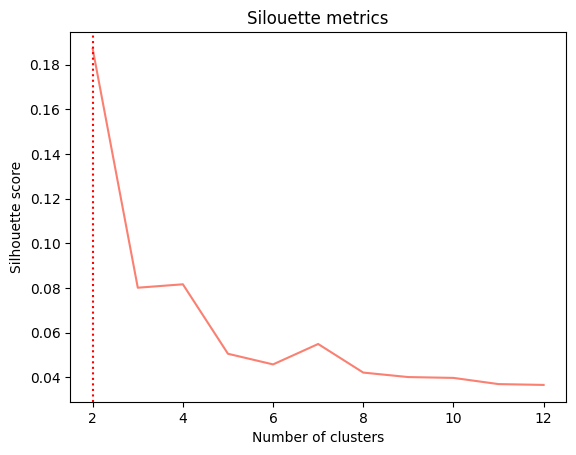

In [29]:
from sklearn.metrics import silhouette_score

data = df_en.copy()

sil_scores = list()
for i in range(2, 13):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(data)
    sil_scores.append(silhouette_score(data, kmeans.labels_))

plt.plot(range(2, 13), sil_scores, color = 'salmon')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silouette metrics')
plt.axvline(x = sil_scores.index(max(sil_scores))+2, linestyle = 'dotted', color = 'red') 
plt.show()

In [10]:
data = df_en.copy()
clustering_kmeans = KMeans(n_clusters=4).fit(data)
# data['clusters'] = clustering_kmeans.fit_predict(data)

dict_clusters = {}

# for key, row in data.iterrows():
#     if row["clusters"] not in dict_clusters.keys():
#         dict_clusters[row["clusters"]] = [key]
#     else:
#         dict_clusters[row["clusters"]].append(key)

#data['clusters'].unique()
#data['clusters']
# s = 0
# for key, value in dict_clusters.items():
#     print(key, len(value))
#     s += len(value)
# print(s)
#dict_clusters

In [12]:
from sklearn.manifold import TSNE
# Random state we define this random state to use this value in TSNE which is a randmized algo.
Y = clustering_kmeans.labels_
RS = 25111993
digits_proj = TSNE(random_state=RS).fit_transform(data)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [40]:
import matplotlib.patheffects as PathEffects

# An user defined function to create scatter plot of vectors
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("Paired", 4))

    # We create a scatter plot.
    f = plt.figure(figsize=(32, 32))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(int)])
    plt.colorbar(sc)
    plt.title("Clusters da seção 'Plot' dos artigos em inglês", fontsize=40)
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    #ax.axis('off')
    ax.axis('tight')

    # We add the labels for each cluster.
    txts = []
    for i in range(4):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=50)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

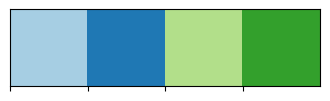

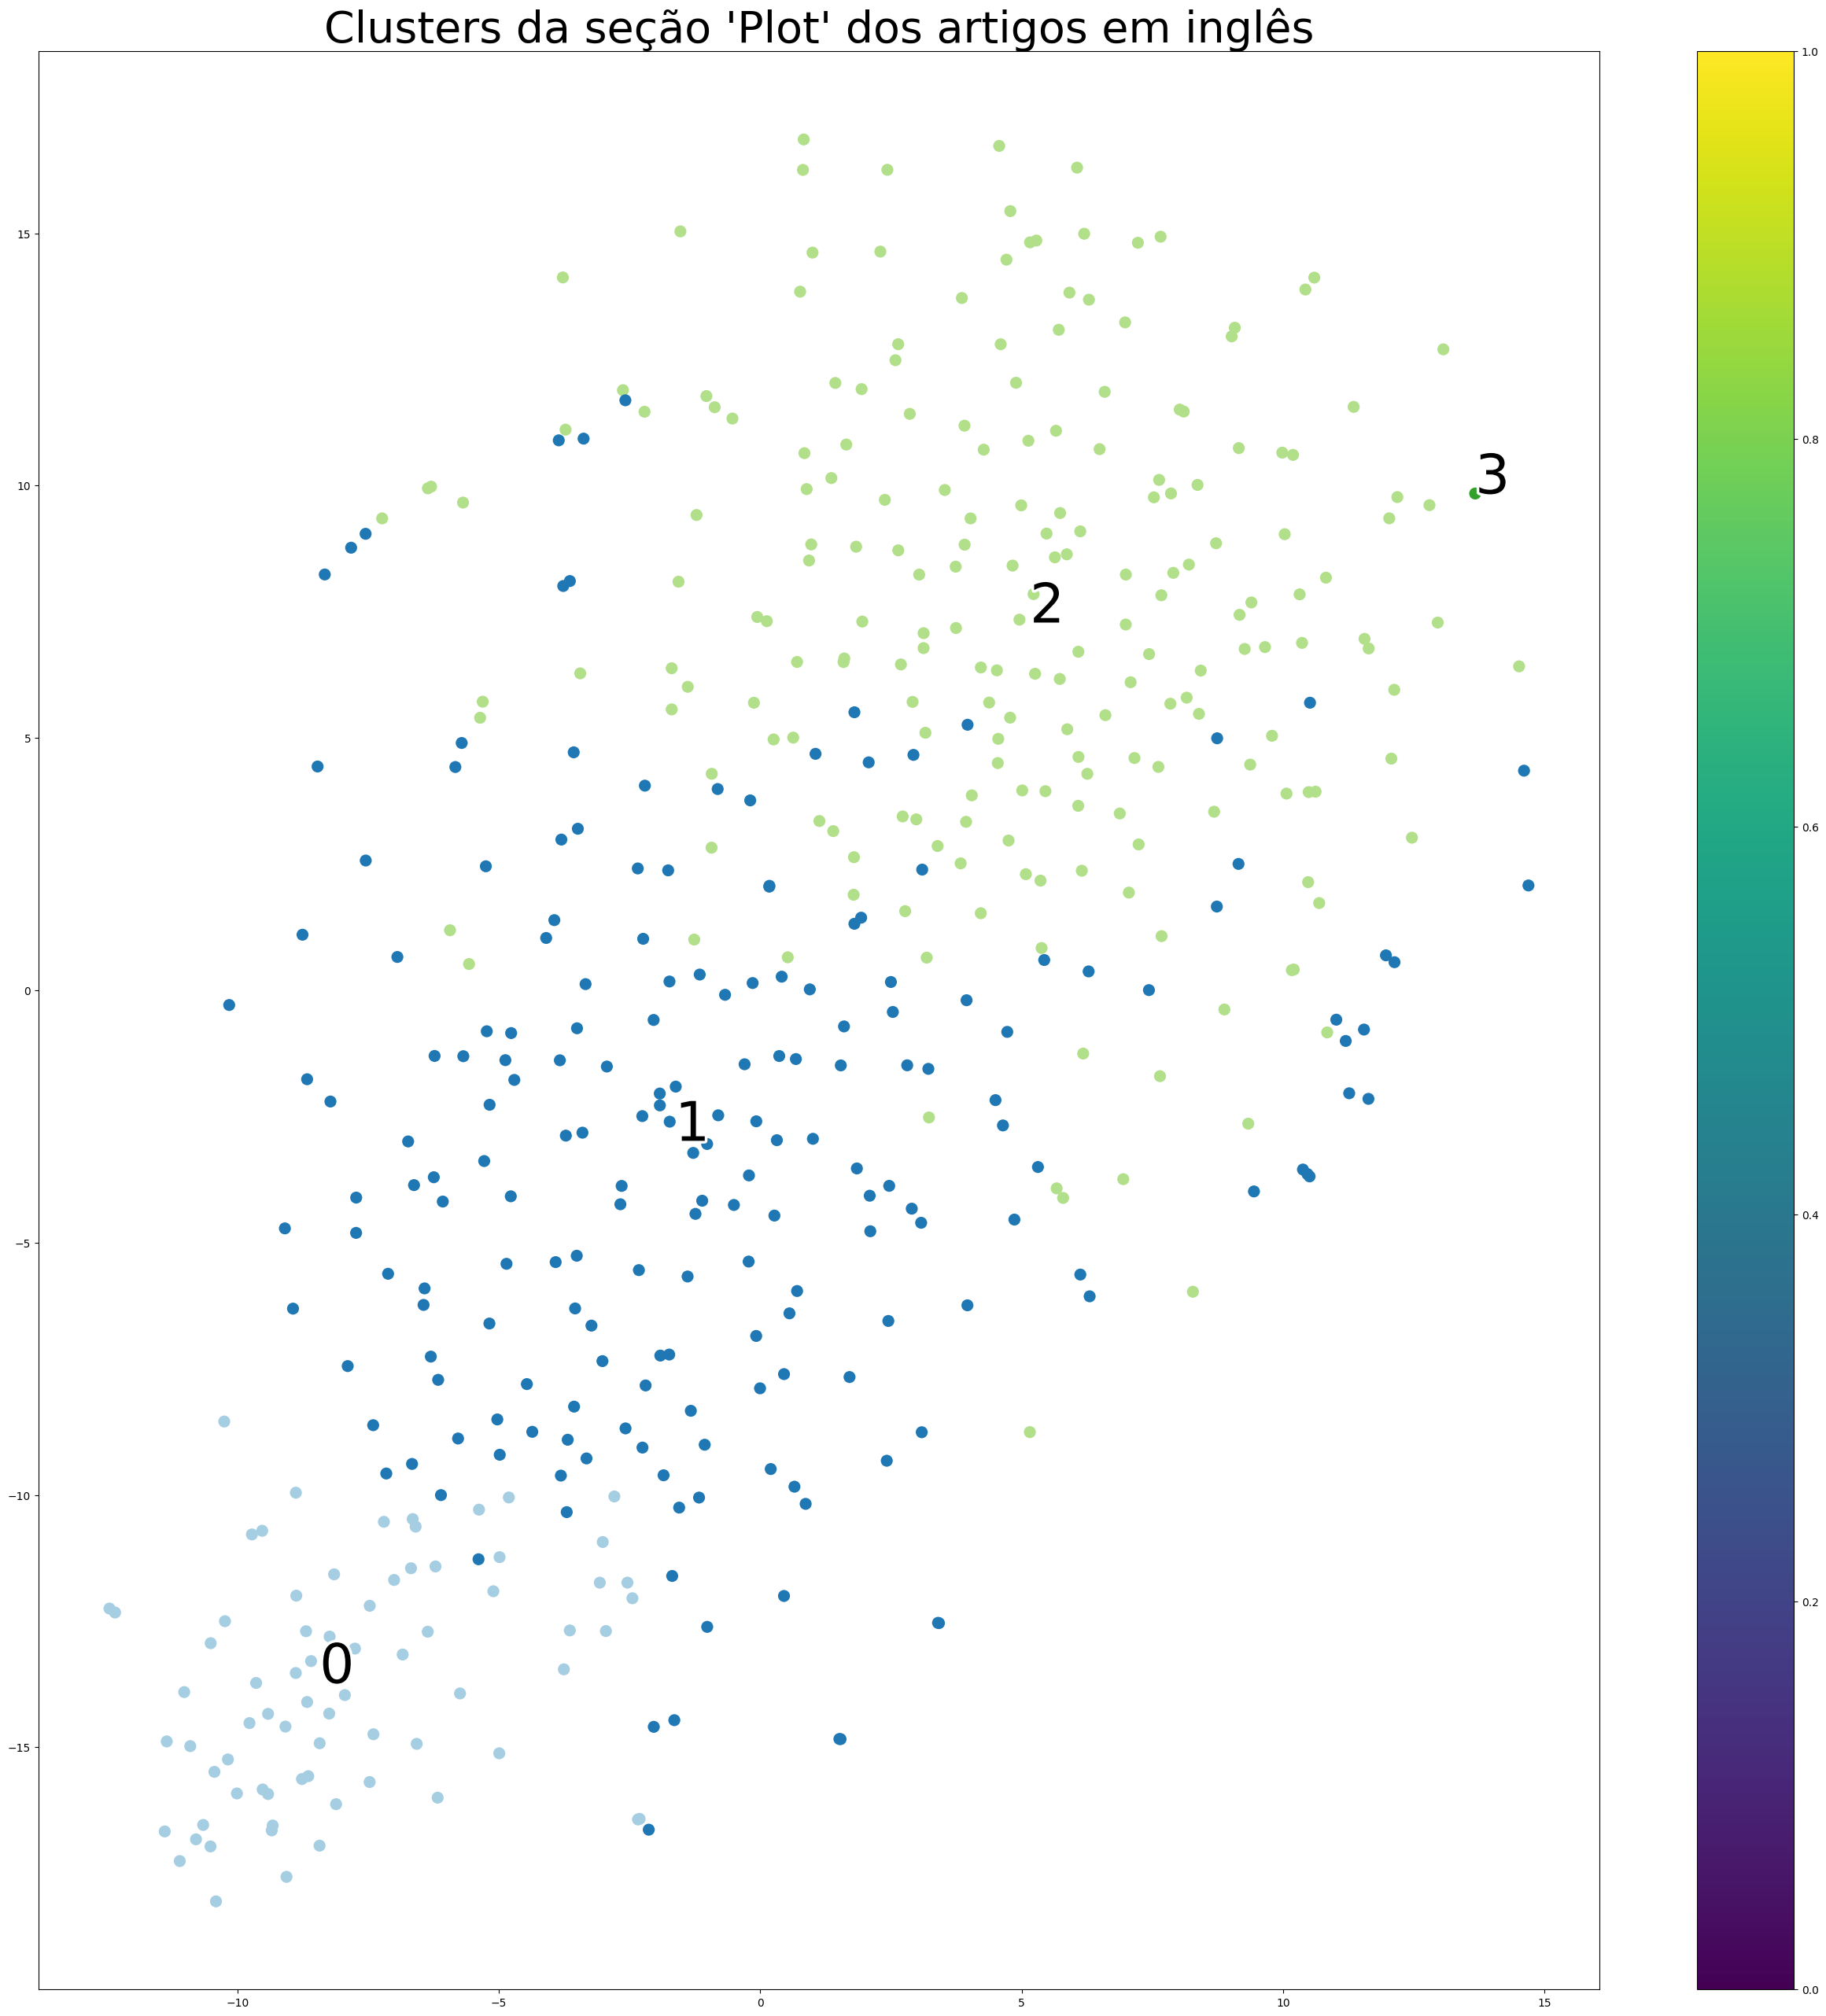

In [41]:
sns.palplot(np.array(sns.color_palette("Paired", 4)))
scatter(digits_proj, Y)
plt.savefig('digits_tsne-generated_4_cluster.png', dpi=120)
plt.show()

In [9]:
data

,Damaging and destroying,Fixing and mending,Suitability,Suitable,Caution,"Chance, luck",Lucky,"Generally kinds, groups, examples",Particular/general; detail,Detailed,...,Ability and intelligence,Success and failure,Success,Failure,Science and technology in general,Anti-scientific,Information technology and computing,Low-tech,Geographical names,clusters
Peyton Place (film).txt,0.020050,0.0,0.0,0.000000,0.0,0.000000,0.0,0.020050,0.0,0.000000,...,0.0,0.002506,0.020050,0.012531,0.002506,0.0,0.002506,0.0,0.055138,0
The Good Earth (film).txt,0.004651,0.0,0.0,0.000000,0.0,0.000000,0.0,0.004651,0.0,0.000000,...,0.0,0.000000,0.041860,0.013953,0.000000,0.0,0.000000,0.0,0.009302,0
Crossfire (film).txt,0.010601,0.0,0.0,0.007067,0.0,0.000000,0.0,0.003534,0.0,0.017668,...,0.0,0.000000,0.031802,0.000000,0.000000,0.0,0.007067,0.0,0.014134,0
Black Panther (film).txt,0.005952,0.0,0.0,0.002976,0.0,0.000000,0.0,0.014881,0.0,0.000000,...,0.0,0.000000,0.002976,0.000000,0.017857,0.0,0.000000,0.0,0.101190,2
The Favourite.txt,0.011628,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.011628,0.023256,0.003876,0.000000,0.0,0.000000,0.0,0.042636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Shakespeare in Love.txt,0.005865,0.0,0.0,0.000000,0.0,0.000000,0.0,0.008798,0.0,0.000000,...,0.0,0.000000,0.014663,0.000000,0.000000,0.0,0.000000,0.0,0.134897,1
Women Talking (film).txt,0.023881,0.0,0.0,0.000000,0.0,0.002985,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.011940,0.000000,0.000000,0.0,0.008955,0.0,0.000000,0
Patton (film).txt,0.004264,0.0,0.0,0.000000,0.0,0.000000,0.0,0.019190,0.0,0.002132,...,0.0,0.000000,0.014925,0.004264,0.000000,0.0,0.000000,0.0,0.245203,3
The Maltese Falcon (1941 film).txt,0.020349,0.0,0.0,0.000000,0.0,0.005814,0.0,0.005814,0.0,0.002907,...,0.0,0.000000,0.023256,0.002907,0.000000,0.0,0.020349,0.0,0.093023,2


In [13]:
with open('myfile.txt', 'w') as f:
    f.write(str(dict_clusters))

# dict_clusters

         pca1      pca2
0    0.985853 -0.007004
1    0.987015 -0.051242
2    0.986858 -0.043339
3   -1.014830 -0.011635
4    0.986213 -0.015090
..        ...       ...
466 -1.015696  0.015249
467  0.987383 -0.059561
468 -0.019307  0.152486
469 -1.014588 -0.029279
470 -0.016609  0.056590

[471 rows x 2 columns]


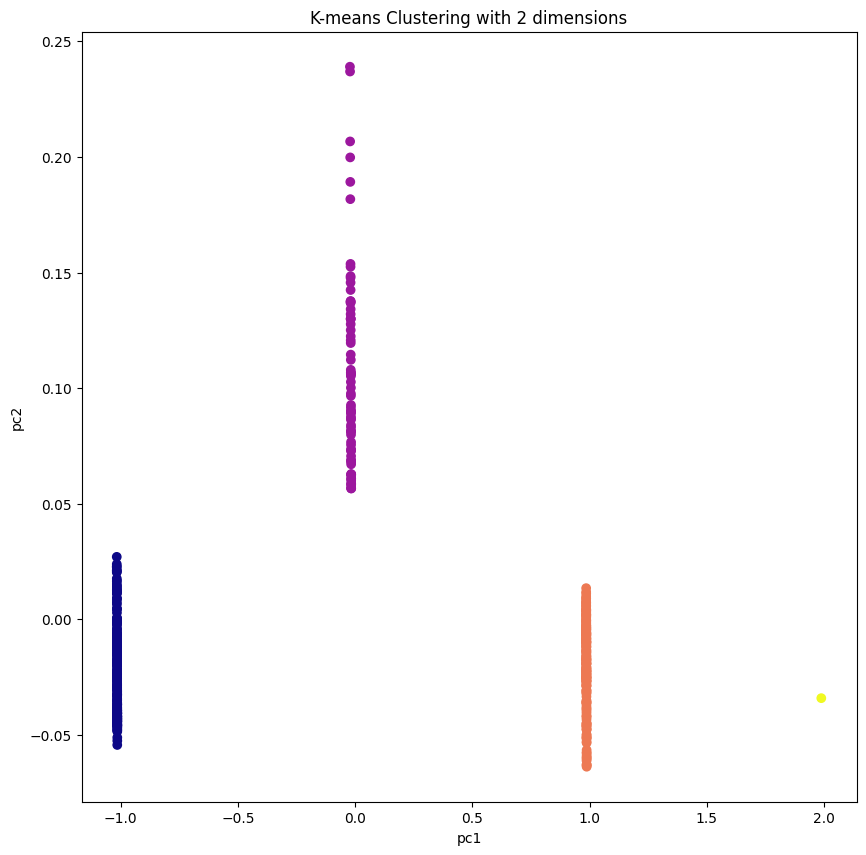

In [12]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

print(results)

fig = plt.figure(figsize=(10,10))
plt.scatter(results['pca1'],results['pca2'],c=data['clusters'],cmap='plasma')
#plt.scatter(results['pca1'],results['pca2'])
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.title('K-means Clustering with 2 dimensions')
plt.show()

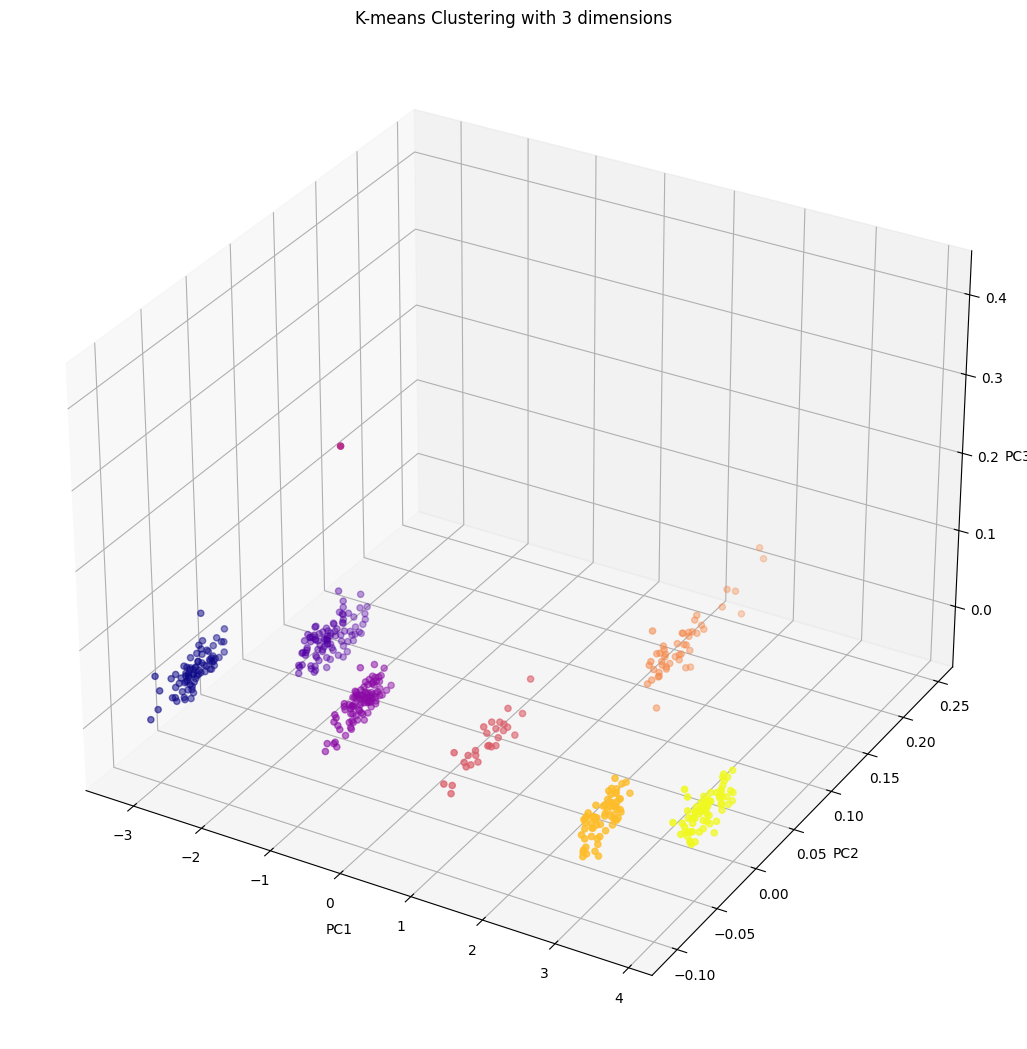

In [100]:
pca_num_components = 3

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])

fig = plt.figure(figsize=(13,20))
# plt.scatter(results['pca1'],results['pca2'],c=data['clusters'],cmap='plasma')
# plt.xlabel('pc1')
# plt.ylabel('pc2')

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(results['pca1'],results['pca2'],results['pca3'], c=data['clusters'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

plt.title('K-means Clustering with 3 dimensions')
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
clusters = dbscan.fit_predict(reduced_data)
print(clusters)
df_en['clusters'] = clusters
df_en

In [14]:
df_en["clusters"].unique()

KeyError: 'clusters'

In [10]:
categ_clusters = np.unique(maxValueIndex.values)
clusters = {}
for i in categ_clusters:
    clusters[i] = []
#clusters

In [14]:
for items in maxValueIndex.iteritems(): 
    clusters[items[1]].append(items[0])
    #print(items)
#clusters

/var/folders/fp/22qg4pcs1fb435p63ml8pvb40000gn/T/ipykernel_807/2634591003.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for items in maxValueIndex.iteritems():


{'Anatomy and physiology': ['The Kids Are All Right (film).txt',
  'Minari (film).txt',
  'Chinatown (1974 film).txt',
  'The Shape of Water.txt',
  'David Copperfield (1935 film).txt',
  'The Kids Are All Right (film).txt',
  'Minari (film).txt',
  'Chinatown (1974 film).txt',
  'The Shape of Water.txt',
  'David Copperfield (1935 film).txt'],
 'Architecture, houses and buildings': ['Mildred Pierce (film).txt',
  'Once Upon a Time in Hollywood.txt',
  'Up (2009 film).txt',
  'Lenny (film).txt',
  'Picnic (1955 film).txt',
  'Mildred Pierce (film).txt',
  'Once Upon a Time in Hollywood.txt',
  'Up (2009 film).txt',
  'Lenny (film).txt',
  'Picnic (1955 film).txt'],
 'Belonging to a group': ['Get Out.txt', 'Get Out.txt'],
 'Crime': ['Born Yesterday (1950 film).txt', 'Born Yesterday (1950 film).txt'],
 'Damaging and destroying': ['East Lynne (1931 film).txt',
  'Top Gun: Maverick.txt',
  'East Lynne (1931 film).txt',
  'Top Gun: Maverick.txt'],
 'Dead': ['Crossfire (film).txt', 'Crossfir

In [41]:
clusters.keys()

dict_keys(['Anatomy and physiology', 'Architecture, houses and buildings', 'Belonging to a group', 'Calm', 'Chance, luck', 'Cleaning and personal care', 'Clothes and personal belongings', 'Competition', 'Content', 'Crime', 'Damaging and destroying', 'Detailed', 'Disease', 'Drama, the theatre and show business', 'Drinks and alcohol', 'Education in general', 'Emotional Actions, States And Processes General', 'Ethical', 'Evaluation: Good/bad', 'Fear/shock', 'Food', 'Furniture and household fittings', 'General appearance and physical properties', 'Generally kinds, groups, examples', 'Geographical names', 'Getting and possession', 'Giving', 'Government', 'Happy', 'Helping', 'Hindering', 'Information technology and computing', 'Investigate, examine, test, search', 'Judgement of appearance: Ugly', 'Knowledgeable', 'Law and order', 'Lawful', 'Light', 'Living creatures: animals, birds, etc.', 'Medicines and medical treatment', 'Mental actions and processes', 'Money generally', 'Money: Cost and 

In [12]:
results = []
df_analise_categ = pd.read_csv("pymusas_dict.csv", sep=";")
df_analise_categ["Count"] = [0 for i in range(len(df_analise_categ))]
df_analise_categ.set_index('Tag', inplace=True)
df_analise_categ

for file in clusters["Drama, the theatre and show business"]:
    article = open(path + file, 'r')
    content = article.read()
    result = process_text_en(content)
    results.append(result)

for result in results:
    for sub_result in result:
        for tag in sub_result['USAS Tags']:
            if tag in df_analise_categ.index:
                df_analise_categ.at[tag, 'Count'] += 1

df_analise_categ["Count"] = df_analise_categ["Count"] / df_analise_categ["Count"].sum()
df_analise_categ = df_analise_categ.reset_index()
for index, row in df_analise_categ.iterrows():
    if row["Count"] == 0:
        df_analise_categ = df_analise_categ.drop(index)
df_analise_categ = df_analise_categ.sort_values(by="Count", ascending=False)

df_analise_categ = df_analise_categ.drop([36, 211, 446, 452, 450])
df_analise_categ

,Tag,Categoria,Count
55,A5.4+,Evaluation: Authentic,0.040778
1,A1.1.1,General actions / making,0.028576
361,T1.3,Time: Period,0.025795
190,K4,"Drama, the theatre and show business",0.020080
32,A2.2,Cause&Effect/Connection,0.018227
...,...,...,...
182,I3.2,Work and employment: Professionalism,0.000154
303,S1.2.2+,Greedy,0.000154
416,X5.1+,Attentive,0.000154
168,I1.1-,Money: Lack,0.000154


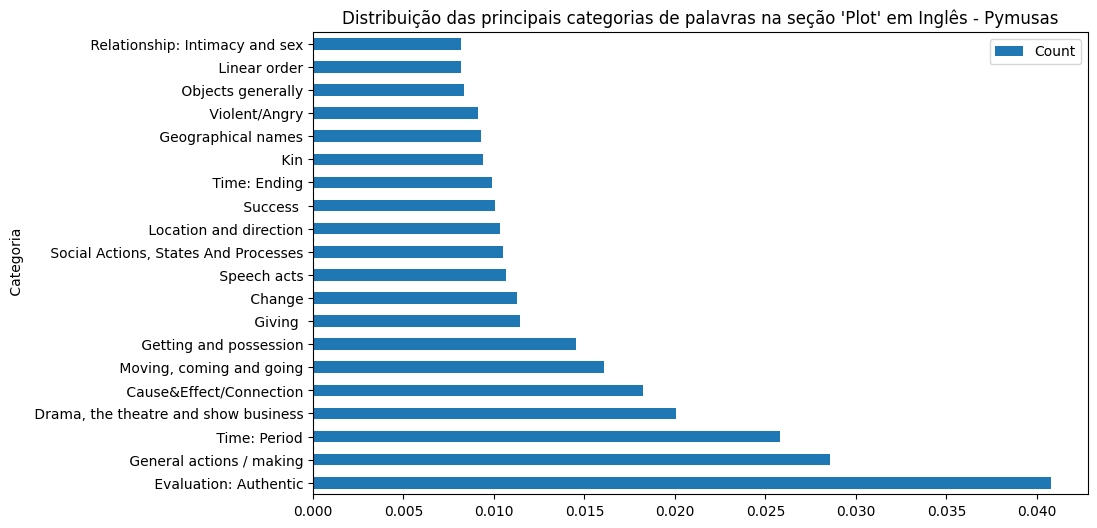

In [13]:
df_plot = df_analise_categ.iloc[:20]
df_plot.plot(x=" Categoria", y=["Count"], kind='barh', figsize=(10,6))
plt.title("Distribuição das principais categorias de palavras na seção 'Plot' em Inglês - Pymusas")
plt.yticks(fontsize=10)
plt.show()

# ESPANHOL

In [42]:
index = os.listdir("./data/plots_es/")
plots = pd.read_csv("./data/oscar_full_plot.csv", sep=';')

df_es = pd.DataFrame(index=index, columns=categories)
for c in categories:
    df_es[c] = [0 for _ in range(len(index))]
#df_es

In [43]:
path = "./data/plots_es/"
dict_maior = {}

for file in index:
    if file in plots["FILENAME_ES"].values:
        article = open(path + file, 'r')
        content = article.read()
        result = process_text_es(content)

        for e in result:
            for tag in e['USAS Tags']:
                if tag in df_tags.index:
                    tag_cat = df_tags.loc[tag, " Categoria"].strip()
                if tag_cat in categories:
                    df_es.at[file, tag_cat] += 1

maxValueIndex = df_es.idxmax(axis=1)
df_es = df_es.loc[:,:].div(df_es.sum(axis=1), axis=0)
# df_es
#maxValueIndex

In [51]:
df_es.to_csv("df_es_pymusas.csv", sep=';', index=True)

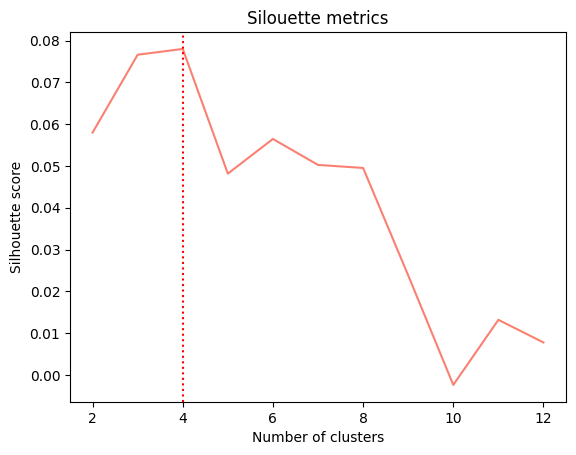

In [27]:
from sklearn.metrics import silhouette_score

data2 = df_es.copy()

sil_scores = list()
for i in range(2, 13):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(data2)
    sil_scores.append(silhouette_score(data2, kmeans.labels_))

plt.plot(range(2, 13), sil_scores, color = 'salmon')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silouette metrics')
plt.axvline(x = sil_scores.index(max(sil_scores))+2, linestyle = 'dotted', color = 'red') 
plt.show()

In [56]:
data2 = df_es.copy()
clustering_kmeans = KMeans(n_clusters=4).fit(data2)
#data2['clusters'] = clustering_kmeans.fit_predict(data2)

# dict_clusters2 = {}

# for key, row in data2.iterrows():
#     if row["clusters"] not in dict_clusters2.keys():
#         dict_clusters2[row["clusters"]] = [key]
#     else:
#         dict_clusters2[row["clusters"]].append(key)

# s = 0
# for key, value in dict_clusters2.items():
#     print(key, len(value))
#     s += len(value)
# print(s)

In [57]:
from sklearn.manifold import TSNE
# Random state we define this random state to use this value in TSNE which is a randmized algo.
Y = clustering_kmeans.labels_
RS = 25111993
digits_proj = TSNE(random_state=RS).fit_transform(data2)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


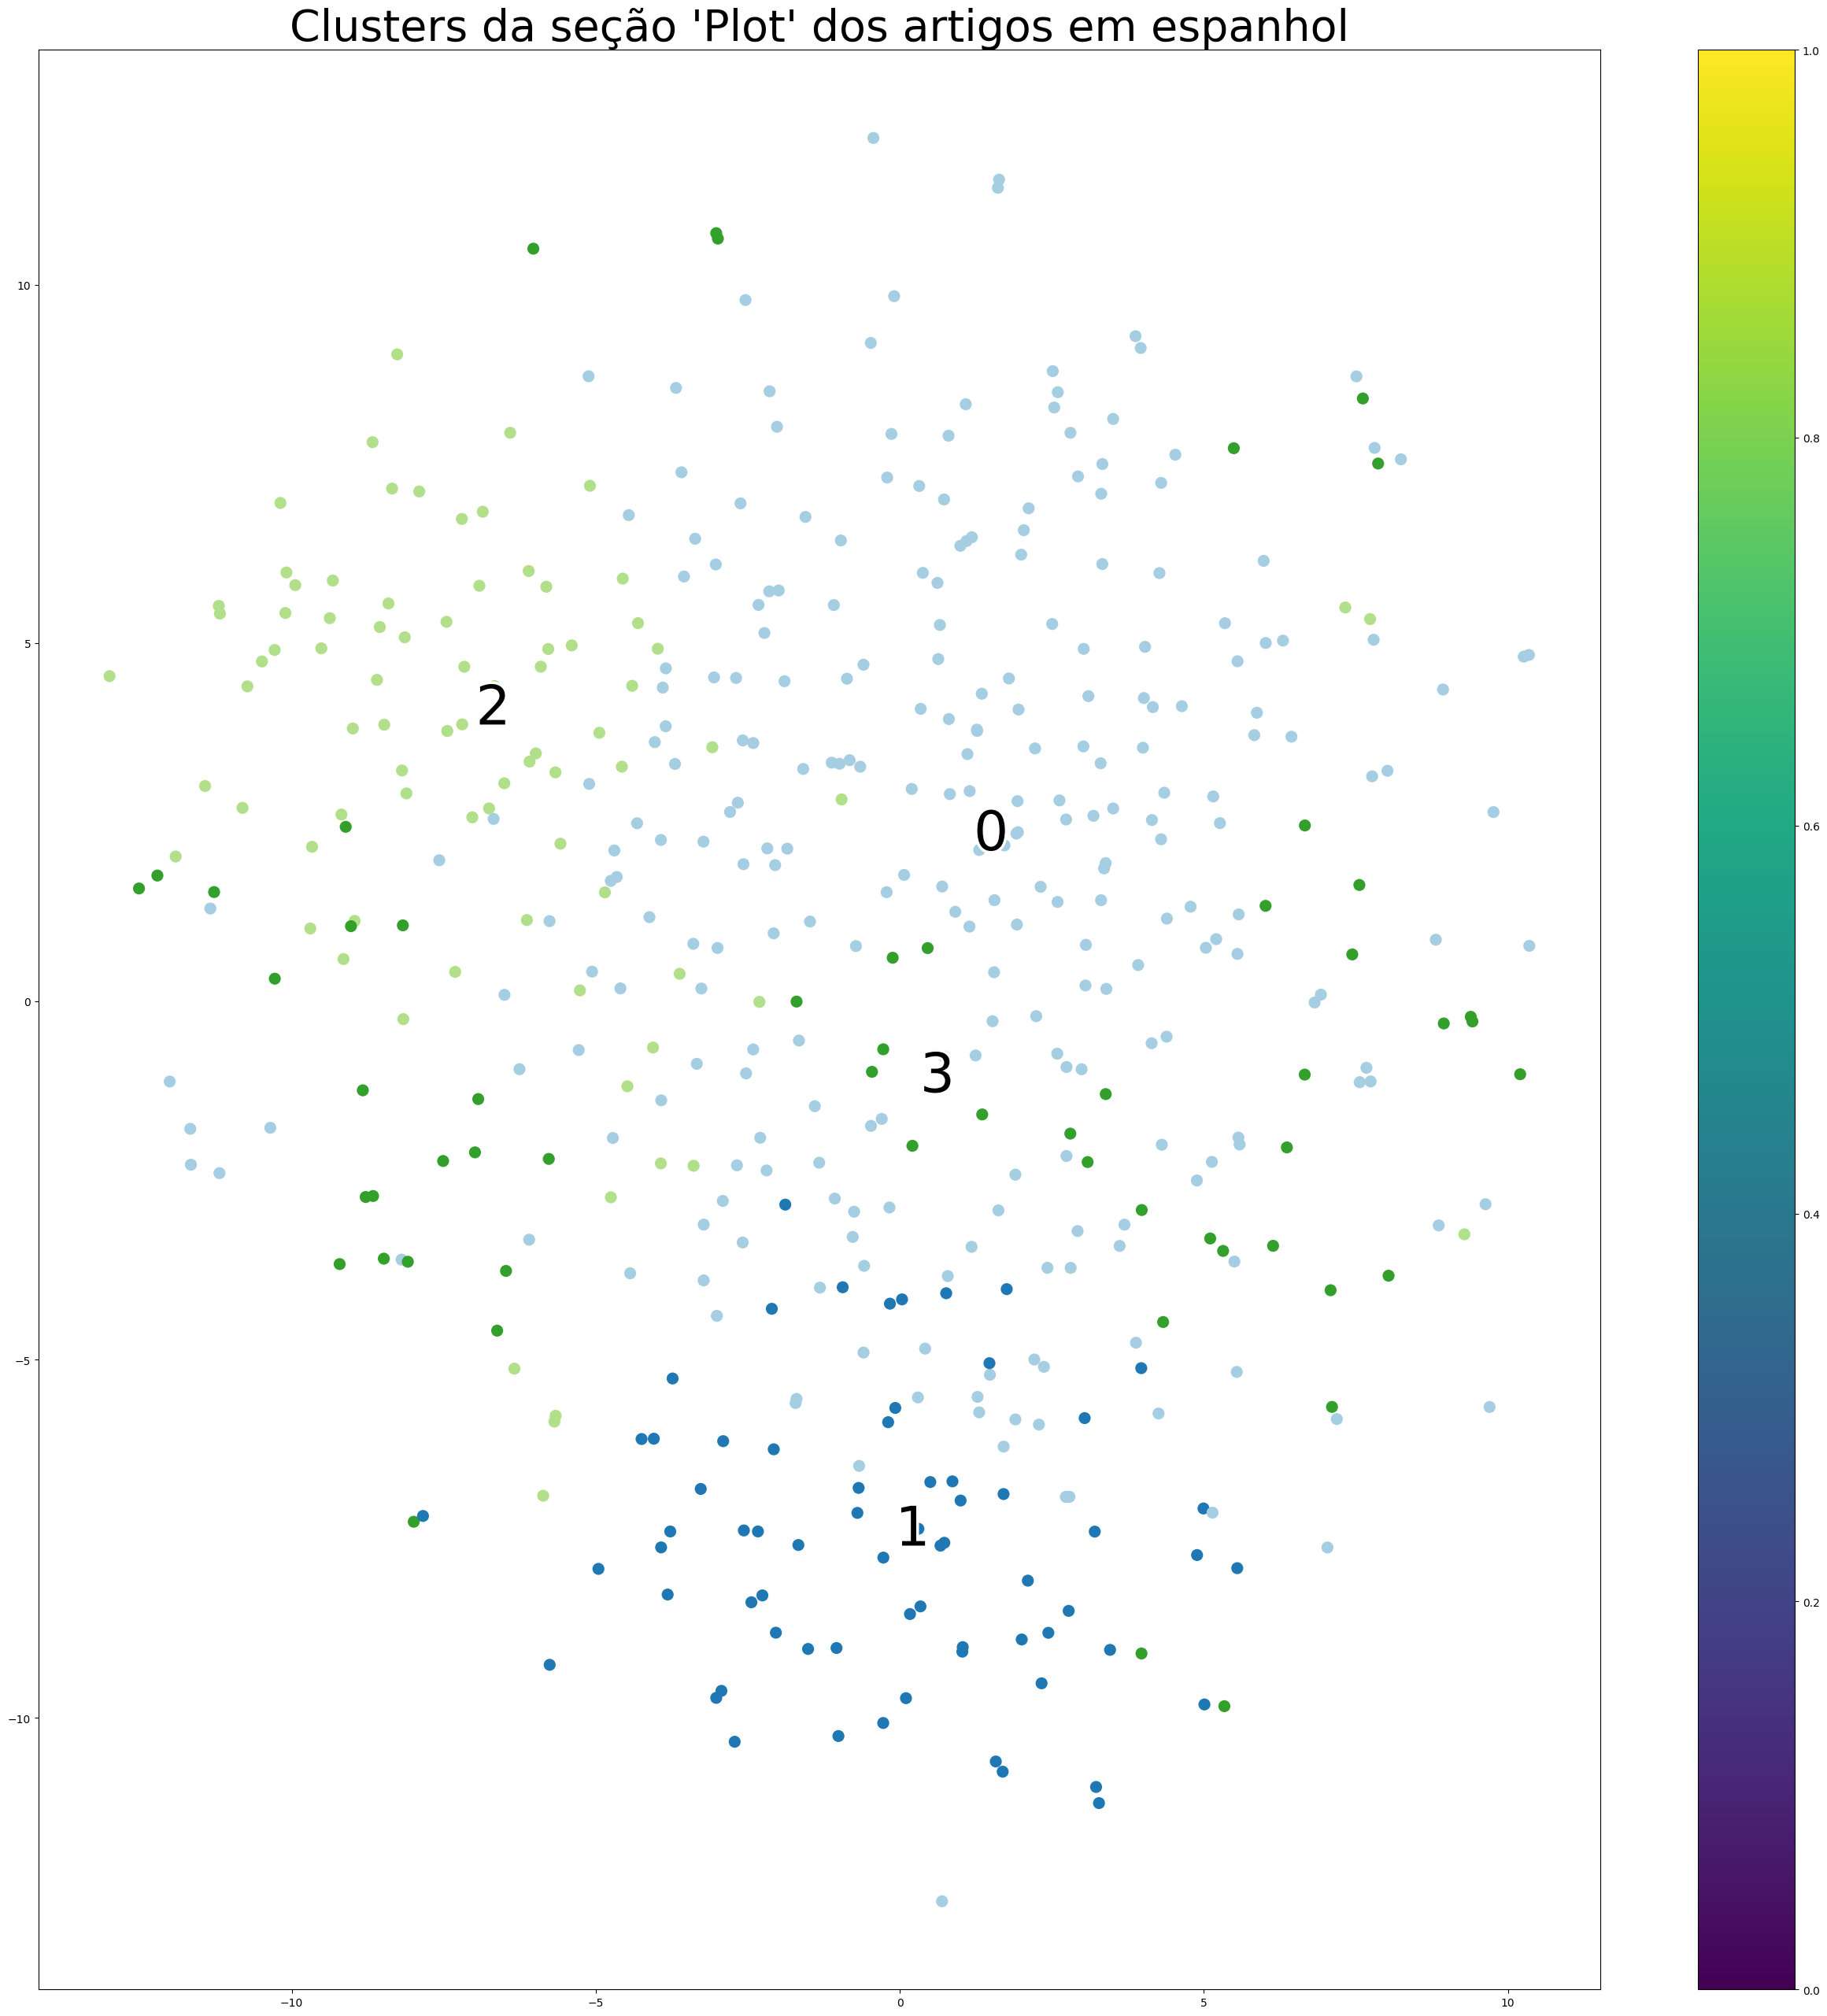

In [58]:
import matplotlib.patheffects as PathEffects

# An user defined function to create scatter plot of vectors
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("Paired", 4))

    # We create a scatter plot.
    f = plt.figure(figsize=(32, 32))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(int)])
    plt.colorbar(sc)
    plt.title("Clusters da seção 'Plot' dos artigos em espanhol", fontsize=40)
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    #ax.axis('off')
    ax.axis('tight')

    # We add the labels for each cluster.
    txts = []
    for i in range(4):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=50)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

scatter(digits_proj, Y)
plt.savefig('resultado tsne es.png', dpi=120)
plt.show()

In [18]:
with open('myfile.txt', 'a') as f:
    f.write(str(dict_clusters2))

         pca1      pca2
0   -2.085850 -0.012254
1    0.915098  0.006719
2   -0.085881 -0.048539
3   -1.084902 -0.017143
4    2.915008 -0.037233
..        ...       ...
466 -1.084473 -0.012275
467 -1.085042 -0.025985
468  0.915444 -0.001226
469  2.915368  0.026200
470 -2.084527  0.076105

[471 rows x 2 columns]


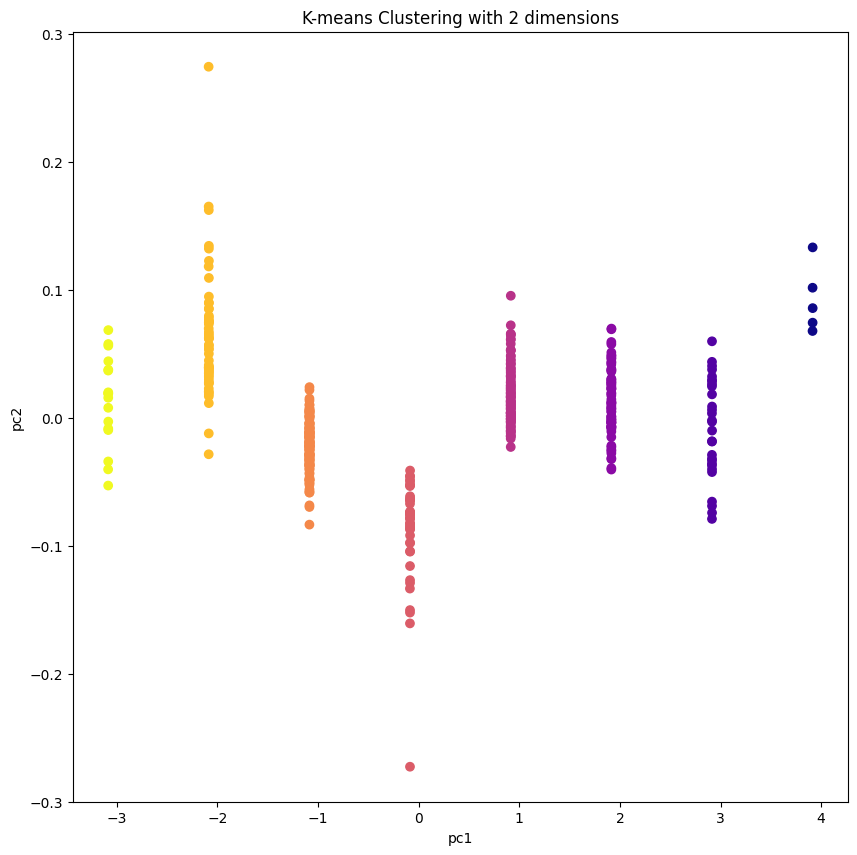

In [111]:
pca_num_components = 2

reduced_data2 = PCA(n_components=pca_num_components).fit_transform(data2)
results2 = pd.DataFrame(reduced_data2,columns=['pca1','pca2'])

print(results2)

fig = plt.figure(figsize=(10,10))
plt.scatter(results2['pca1'],results2['pca2'],c=data2['clusters'],cmap='plasma')
#plt.scatter(results2['pca1'],results2['pca2'])
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.title('K-means Clustering with 2 dimensions')
plt.show()

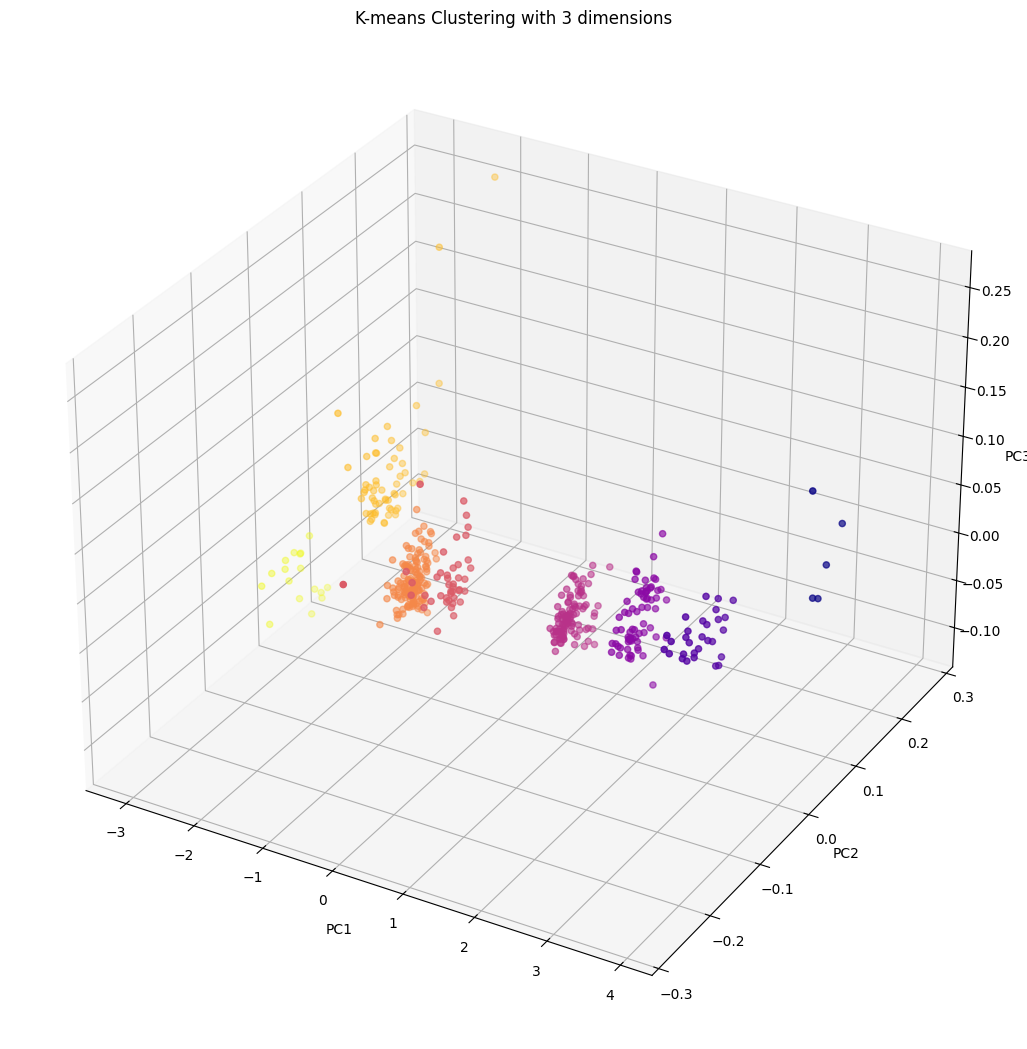

In [112]:
pca_num_components = 3

reduced_data2 = PCA(n_components=pca_num_components).fit_transform(data2)
results2 = pd.DataFrame(reduced_data2,columns=['pca1','pca2','pca3'])

fig = plt.figure(figsize=(13,20))
# plt.scatter(results2['pca1'],results2['pca2'],c=data['clusters'],cmap='plasma')
# plt.xlabel('pc1')
# plt.ylabel('pc2')

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(results2['pca1'],results2['pca2'],results2['pca3'], c=data2['clusters'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

plt.title('K-means Clustering with 3 dimensions')
plt.show()

In [ ]:
categ_clusters = np.unique(maxValueIndex.values)
clusters = {}
for i in categ_clusters:
    clusters[i] = []
clusters

In [ ]:
for items in maxValueIndex.iteritems(): 
    clusters[items[1]].append(items[0])
    #print(items)
clusters

In [ ]:
results = []
df_analise_categ = pd.read_csv("pymusas_dict.csv", sep=";")
df_analise_categ["Count"] = [0 for i in range(len(df_analise_categ))]
df_analise_categ.set_index('Tag', inplace=True)
df_analise_categ

for file in clusters["Drama, the theatre and show business"]:
    article = open(path + file, 'r')
    content = article.read()
    result = process_text_es(content)
    results.append(result)

for result in results:
    for sub_result in result:
        for tag in sub_result['USAS Tags']:
            if tag in df_analise_categ.index:
                df_analise_categ.at[tag, 'Count'] += 1

df_analise_categ["Count"] = df_analise_categ["Count"] / df_analise_categ["Count"].sum()
df_analise_categ = df_analise_categ.reset_index()
for index, row in df_analise_categ.iterrows():
    if row["Count"] == 0:
        df_analise_categ = df_analise_categ.drop(index)
df_analise_categ = df_analise_categ.sort_values(by="Count", ascending=False)

df_analise_categ = df_analise_categ.drop([36, 211, 446, 452, 450])
df_analise_categ

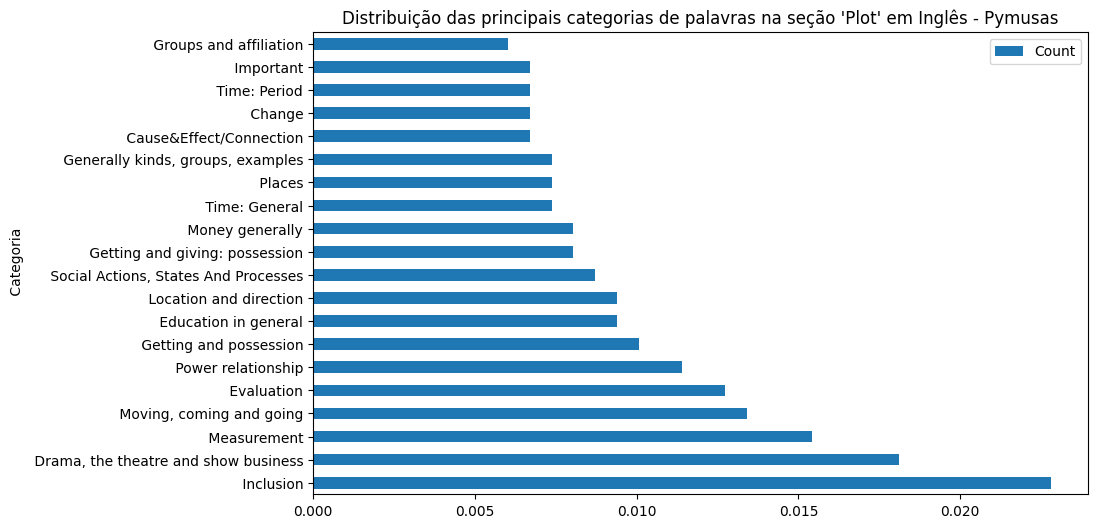

In [66]:
df_plot = df_analise_categ.iloc[:20]
df_plot.plot(x=" Categoria", y=["Count"], kind='barh', figsize=(10,6))
plt.title("Distribuição das principais categorias de palavras na seção 'Plot' em Espanhol - Pymusas")
plt.yticks(fontsize=10)
plt.show()

# PORTUGUÊS

In [49]:
index = os.listdir("./data/plots_pt/")
plots = pd.read_csv("./data/oscar_full_plot.csv", sep=';')

df_pt = pd.DataFrame(index=index, columns=categories)
for c in categories:
    df_pt[c] = [0 for _ in range(len(index))]

In [50]:
path = "./data/plots_pt/"
dict_maior = {}

for file in index:
    if file in plots["FILENAME_PT"].values:
        article = open(path + file, 'r')
        content = article.read()
        result = process_text_pt(content)

        for e in result:
            for tag in e['USAS Tags']:
                if tag in df_tags.index:
                    tag_cat = df_tags.loc[tag, " Categoria"].strip()
                if tag_cat in categories:
                    df_pt.at[file, tag_cat] += 1

df_pt = df_pt.fillna(0)
maxValueIndex = df_pt.idxmax(axis=1)
df_pt = df_pt.loc[:,:].div(df_pt.sum(axis=1), axis=0)

In [54]:
df_pt.to_csv("df_pt_pymusas.csv", sep=';', index=True)

In [115]:
df_pt

,Damaging and destroying,Fixing and mending,Suitability,Suitable,Caution,"Chance, luck",Lucky,"Generally kinds, groups, examples",Particular/general; detail,Detailed,...,Wanting; planning; choosing,Ability and intelligence,Success and failure,Success,Failure,Science and technology in general,Anti-scientific,Information technology and computing,Low-tech,Geographical names
Quo Vadis (1951).txt,0.007937,0.0,0.0,0.007937,0.0,0.007937,0.0,0.023810,0.0,0.023810,...,0.0,0.000000,0.0,0.015873,0.0,0.007937,0.0,0.007937,0.0,0.063492
A Room with a View.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.048780,0.0,0.000000,0.0,0.000000,0.0,0.243902
A Divorciada.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.100000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.1,0.000000,0.0,0.000000,0.0,0.000000
Spotlight (filme).txt,0.004673,0.0,0.0,0.000000,0.0,0.000000,0.0,0.014019,0.0,0.000000,...,0.0,0.000000,0.0,0.009346,0.0,0.000000,0.0,0.065421,0.0,0.000000
All the President's Men.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.019512,0.0,0.019512,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.029268,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Henrique V (filme de 1944).txt,0.016393,0.0,0.0,0.000000,0.0,0.000000,0.0,0.049180,0.0,0.000000,...,0.0,0.000000,0.0,0.049180,0.0,0.000000,0.0,0.000000,0.0,0.081967
Shakespeare in Love.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.018349,0.0,0.000000
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.054054,0.0,0.000000,...,0.0,0.054054,0.0,0.000000,0.0,0.054054,0.0,0.000000,0.0,0.054054
Alice Adams.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.083333,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


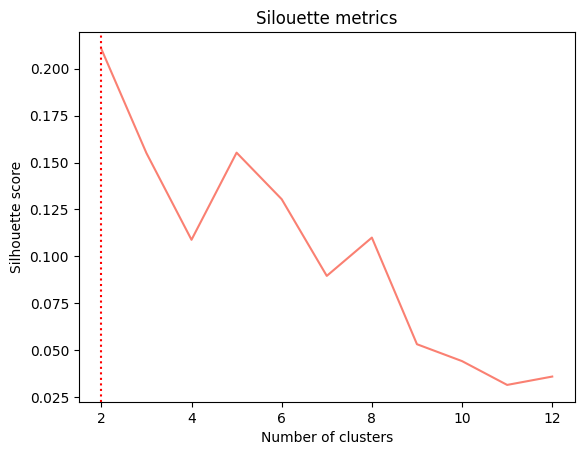

In [28]:
from sklearn.metrics import silhouette_score

data3 = df_pt.copy()
data3.fillna(0, inplace=True)

sil_scores = list()
for i in range(2, 13):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(data3)
    sil_scores.append(silhouette_score(data3, kmeans.labels_))

plt.plot(range(2, 13), sil_scores, color = 'salmon')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silouette metrics')
plt.axvline(x = sil_scores.index(max(sil_scores))+2, linestyle = 'dotted', color = 'red') 
plt.show()

In [51]:
data3 = df_pt.copy()
data3.fillna(0, inplace=True)
clustering_kmeans = KMeans(n_clusters=5).fit(data3)
# data3['clusters'] = clustering_kmeans.fit_predict(data3)

# dict_clusters3 = {}

# for key, row in data3.iterrows():
#     if row["clusters"] not in dict_clusters3.keys():
#         dict_clusters3[row["clusters"]] = [key]
#     else:
#         dict_clusters3[row["clusters"]].append(key)

# s = 0
# for key, value in dict_clusters3.items():
#     print(key, len(value))
#     s += len(value)
# print(s)

In [52]:
from sklearn.manifold import TSNE
# Random state we define this random state to use this value in TSNE which is a randmized algo.
Y = clustering_kmeans.labels_
RS = 25111993
digits_proj = TSNE(random_state=RS).fit_transform(data3)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


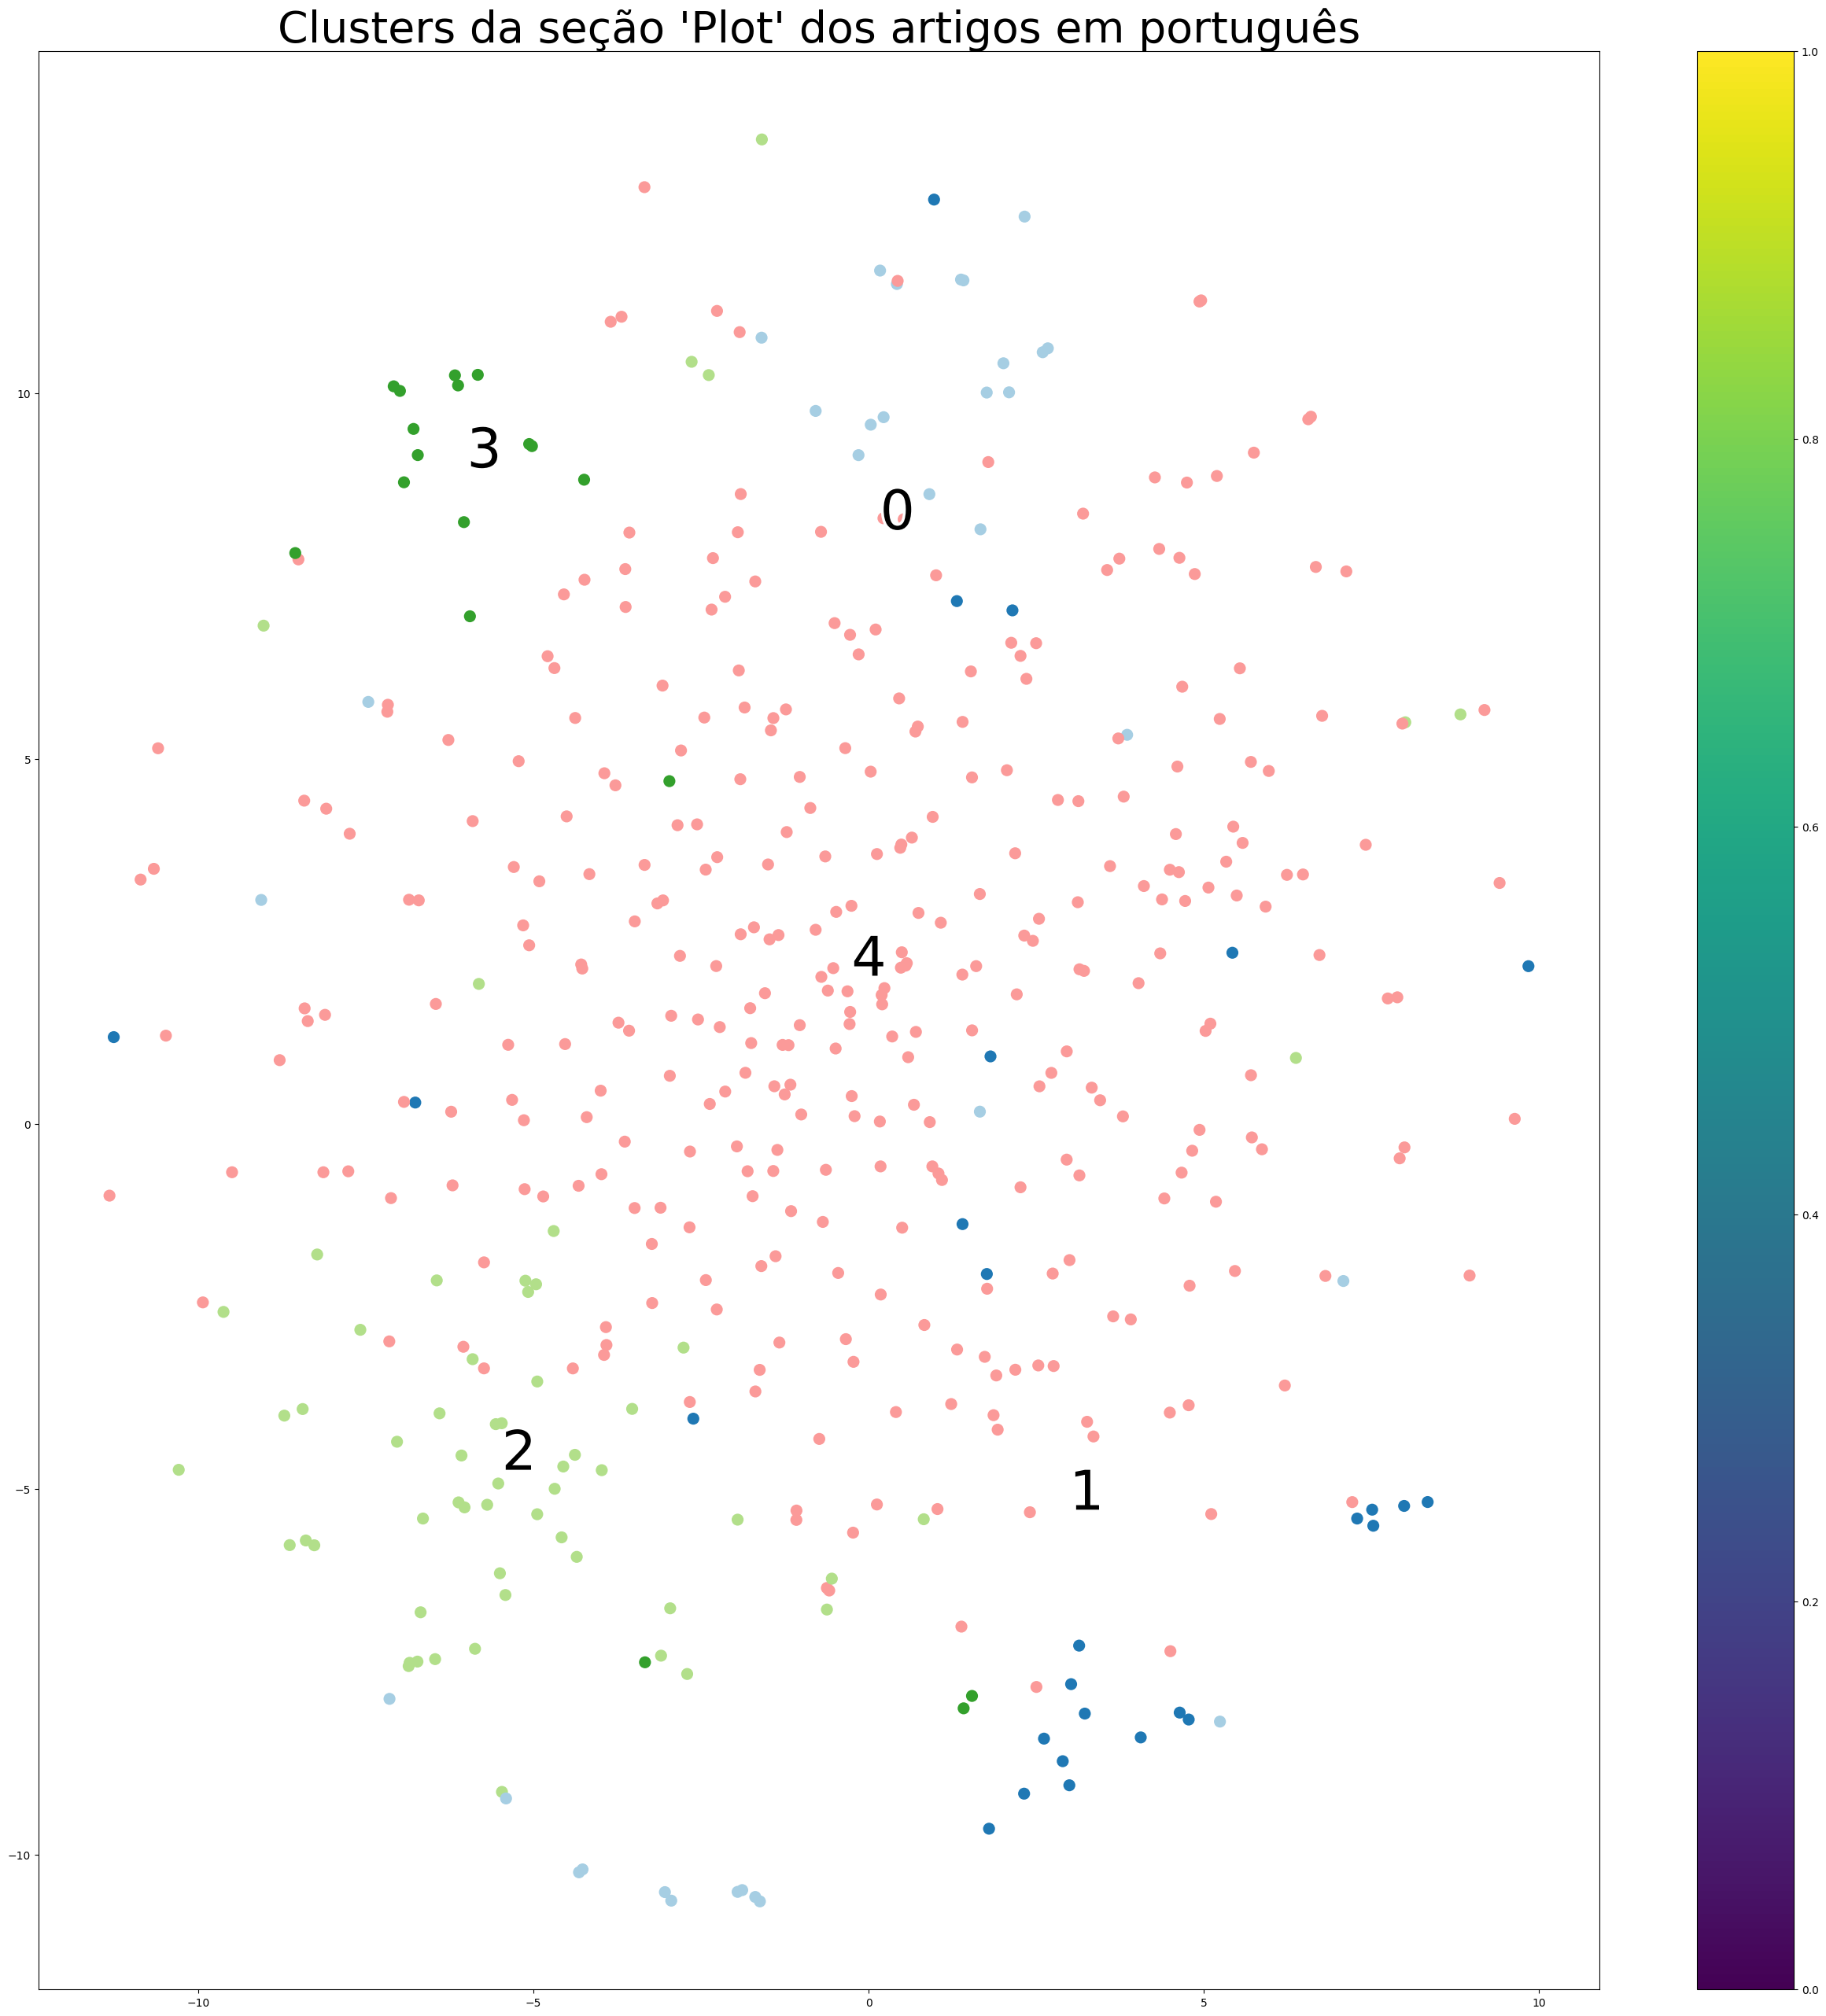

In [55]:
import matplotlib.patheffects as PathEffects

# An user defined function to create scatter plot of vectors
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("Paired", 5))

    # We create a scatter plot.
    f = plt.figure(figsize=(32, 32))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(int)])
    plt.colorbar(sc)
    plt.title("Clusters da seção 'Plot' dos artigos em português", fontsize=40)
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    #ax.axis('off')
    ax.axis('tight')

    # We add the labels for each cluster.
    txts = []
    for i in range(5):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=50)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

scatter(digits_proj, Y)
plt.savefig('resultado tsne pt.png', dpi=120)
plt.show()

In [46]:
len(data3)

471

In [52]:
data3

,Damaging and destroying,Fixing and mending,Suitability,Suitable,Caution,"Chance, luck",Lucky,"Generally kinds, groups, examples",Particular/general; detail,Detailed,...,Ability and intelligence,Success and failure,Success,Failure,Science and technology in general,Anti-scientific,Information technology and computing,Low-tech,Geographical names,clusters
Quo Vadis (1951).txt,0.007937,0.0,0.0,0.007937,0.0,0.007937,0.0,0.023810,0.0,0.023810,...,0.000000,0.0,0.015873,0.0,0.007937,0.0,0.007937,0.0,0.063492,3
A Room with a View.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.048780,0.0,0.000000,0.0,0.000000,0.0,0.243902,0
A Divorciada.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.100000,0.0,0.000000,...,0.000000,0.0,0.000000,0.1,0.000000,0.0,0.000000,0.0,0.000000,3
Spotlight (filme).txt,0.004673,0.0,0.0,0.000000,0.0,0.000000,0.0,0.014019,0.0,0.000000,...,0.000000,0.0,0.009346,0.0,0.000000,0.0,0.065421,0.0,0.000000,3
All the President's Men.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.019512,0.0,0.019512,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.029268,0.0,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Henrique V (filme de 1944).txt,0.016393,0.0,0.0,0.000000,0.0,0.000000,0.0,0.049180,0.0,0.000000,...,0.000000,0.0,0.049180,0.0,0.000000,0.0,0.000000,0.0,0.081967,0
Shakespeare in Love.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.018349,0.0,0.000000,3
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.054054,0.0,0.000000,...,0.054054,0.0,0.000000,0.0,0.054054,0.0,0.000000,0.0,0.054054,3
Alice Adams.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.083333,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,4


In [22]:
with open('myfile.txt', 'a') as f:
    f.write(str(dict_clusters3))

In [38]:
len(df_pt.columns)

184

In [53]:
#df_teste = df_pt.copy()
data3.reset_index(inplace=True)
len_df = len(data3)
print(len_df)
for i in range(len_df):
    
    if data3.iloc[i]['clusters'] != 1:
        data3.at[i, 'clusters'] = 0
        
# Check to see if any null values

data3.isna().sum()

471


index                                   0
Damaging and destroying                 0
Fixing and mending                      0
Suitability                             0
Suitable                                0
                                       ..
Anti-scientific                         0
Information technology and computing    0
Low-tech                                0
Geographical names                      0
clusters                                0
Length: 186, dtype: int64

In [54]:
data3

,index,Damaging and destroying,Fixing and mending,Suitability,Suitable,Caution,"Chance, luck",Lucky,"Generally kinds, groups, examples",Particular/general; detail,...,Ability and intelligence,Success and failure,Success,Failure,Science and technology in general,Anti-scientific,Information technology and computing,Low-tech,Geographical names,clusters
0,Quo Vadis (1951).txt,0.007937,0.0,0.0,0.007937,0.0,0.007937,0.0,0.023810,0.0,...,0.000000,0.0,0.015873,0.0,0.007937,0.0,0.007937,0.0,0.063492,0
1,A Room with a View.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.048780,0.0,0.000000,0.0,0.000000,0.0,0.243902,0
2,A Divorciada.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.100000,0.0,...,0.000000,0.0,0.000000,0.1,0.000000,0.0,0.000000,0.0,0.000000,0
3,Spotlight (filme).txt,0.004673,0.0,0.0,0.000000,0.0,0.000000,0.0,0.014019,0.0,...,0.000000,0.0,0.009346,0.0,0.000000,0.0,0.065421,0.0,0.000000,0
4,All the President's Men.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.019512,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.029268,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Henrique V (filme de 1944).txt,0.016393,0.0,0.0,0.000000,0.0,0.000000,0.0,0.049180,0.0,...,0.000000,0.0,0.049180,0.0,0.000000,0.0,0.000000,0.0,0.081967,0
467,Shakespeare in Love.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.018349,0.0,0.000000,0
468,Dr. Strangelove or: How I Learned to Stop Worr...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.054054,0.0,...,0.054054,0.0,0.000000,0.0,0.054054,0.0,0.000000,0.0,0.054054,0
469,Alice Adams.txt,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.083333,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0


In [59]:
(data3["clusters"] == 0).sum()

437

Text(0, 0.5, 'Count')

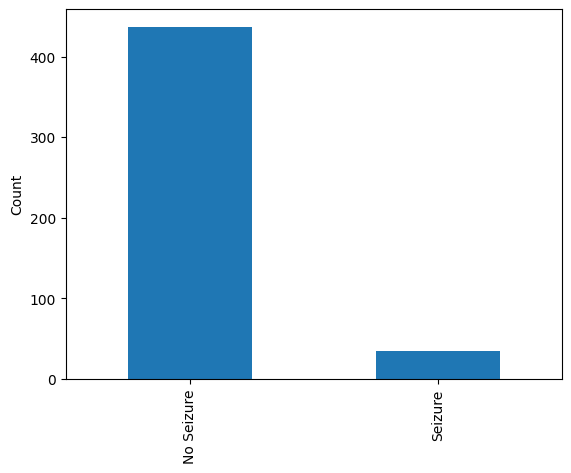

In [65]:
data3 = data3.fillna(data3.mean())

# Define X and y

X = data3.drop('clusters', axis=1)
y = data3.clusters

# Visualize class distribution

y.value_counts().plot(kind='bar')
plt.xticks([0,1], ['No Seizure', 'Seizure'])
plt.ylabel('Count')

In [63]:
data3 = data3.drop("index", axis=1)
data3

,Damaging and destroying,Fixing and mending,Suitability,Suitable,Caution,"Chance, luck",Lucky,"Generally kinds, groups, examples",Particular/general; detail,Detailed,...,Ability and intelligence,Success and failure,Success,Failure,Science and technology in general,Anti-scientific,Information technology and computing,Low-tech,Geographical names,clusters
0,0.007937,0.0,0.0,0.007937,0.0,0.007937,0.0,0.023810,0.0,0.023810,...,0.000000,0.0,0.015873,0.0,0.007937,0.0,0.007937,0.0,0.063492,0
1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.048780,0.0,0.000000,0.0,0.000000,0.0,0.243902,0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.100000,0.0,0.000000,...,0.000000,0.0,0.000000,0.1,0.000000,0.0,0.000000,0.0,0.000000,0
3,0.004673,0.0,0.0,0.000000,0.0,0.000000,0.0,0.014019,0.0,0.000000,...,0.000000,0.0,0.009346,0.0,0.000000,0.0,0.065421,0.0,0.000000,0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.019512,0.0,0.019512,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.029268,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.016393,0.0,0.0,0.000000,0.0,0.000000,0.0,0.049180,0.0,0.000000,...,0.000000,0.0,0.049180,0.0,0.000000,0.0,0.000000,0.0,0.081967,0
467,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.018349,0.0,0.000000,0
468,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.054054,0.0,0.000000,...,0.054054,0.0,0.000000,0.0,0.054054,0.0,0.000000,0.0,0.054054,0
469,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.083333,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0


In [66]:
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [67]:
data3.columns, len(data3.columns)

(Index(['Damaging and destroying', 'Fixing and mending', 'Suitability',
        'Suitable', 'Caution', 'Chance, luck', 'Lucky',
        'Generally kinds, groups, examples', 'Particular/general; detail',
        'Detailed',
        ...
        'Ability and intelligence', 'Success and failure', 'Success', 'Failure',
        'Science and technology in general', 'Anti-scientific',
        'Information technology and computing', 'Low-tech',
        'Geographical names', 'clusters'],
       dtype='object', length=185),
 185)

In [68]:
pca = PCA(n_components=184)
pca.fit(X)
X_pca = pca.transform(X)

Text(0, 0.5, '% Cumulative Variance Explained')

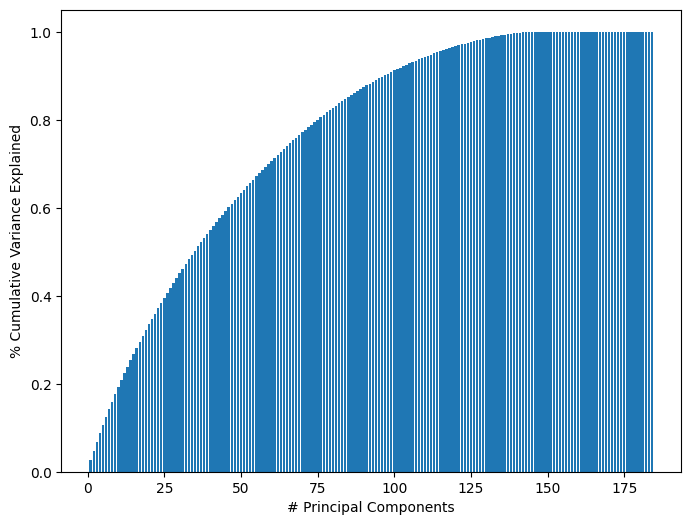

In [70]:
# Calculate cumulative explained variance across all PCs

cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,185), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained')

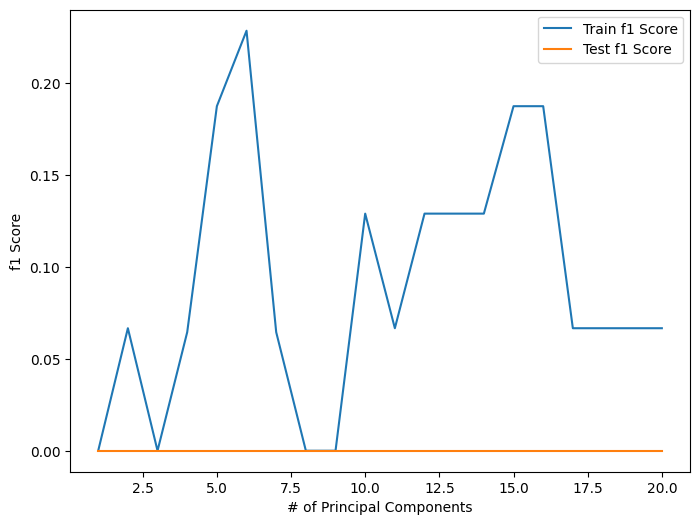

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

train_f1 = []
test_f1 = []

for i in range(20):
    
    X = X_pca[:,0:i+1]
    
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        random_state=42)

    # Perform feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit k-NN classifier and make predictions
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))

# Plot accuracy by n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(range(1,21), train_f1, label='Train f1 Score')
plt.plot(range(1,21), test_f1, label='Test f1 Score')
plt.ylabel('f1 Score')
plt.xlabel('# of Principal Components')
plt.legend()
plt.show()

184


Text(0, 0.5, '% Cumulative Variance Explained')

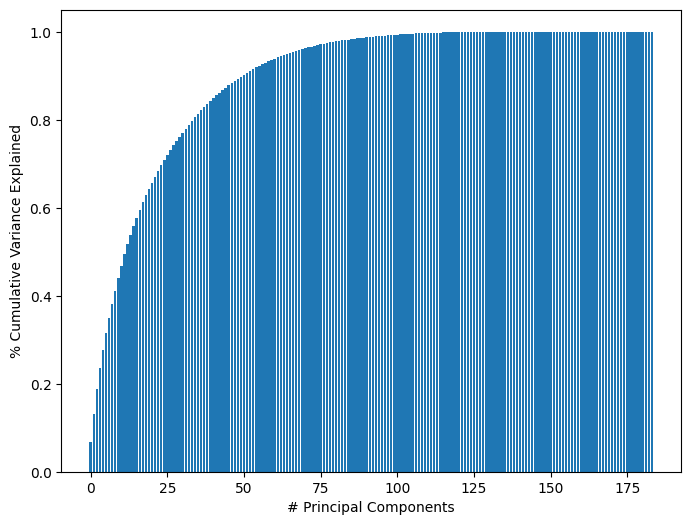

In [48]:
pca_num_components = 184

pca = PCA(n_components=pca_num_components)
pca.fit(data3)
reduced_data3 = pca.transform(data3)

# Calculate cumulative explained variance across all PCs

cum_exp_var = []
var_exp = 0
print(len(pca.explained_variance_ratio_))
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(0,184), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained')

         pca1      pca2
0   -2.925531  0.029101
1    0.072332  0.136710
2    4.074514 -0.056362
3    1.074283 -0.028104
4    1.074101 -0.037970
..        ...       ...
466 -2.926499  0.046638
467  1.074817  0.007612
468 -2.925891  0.019050
469  3.075728  0.131736
470 -1.926599  0.005026

[471 rows x 2 columns]


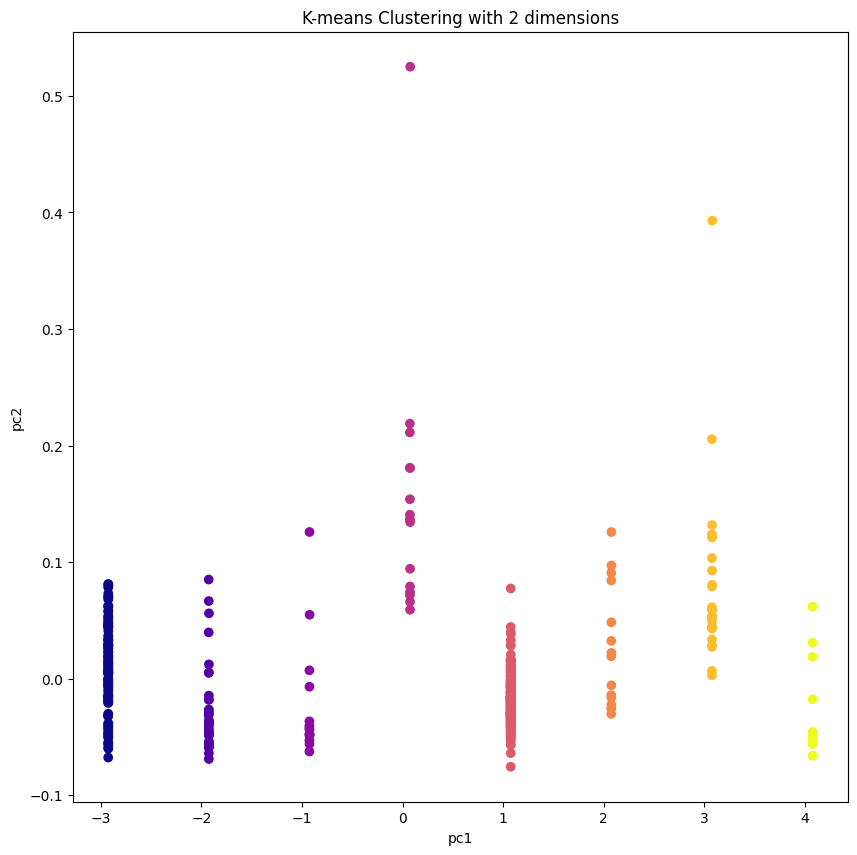

In [129]:
pca_num_components = 2

reduced_data3 = PCA(n_components=pca_num_components).fit_transform(data3)
results3 = pd.DataFrame(reduced_data3,columns=['pca1','pca2'])

print(results3)

fig = plt.figure(figsize=(10,10))
plt.scatter(results3['pca1'],results3['pca2'],c=data3['clusters'],cmap='plasma')
#plt.scatter(results3['pca1'],results3['pca2'])
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.title('K-means Clustering with 2 dimensions')
plt.show()

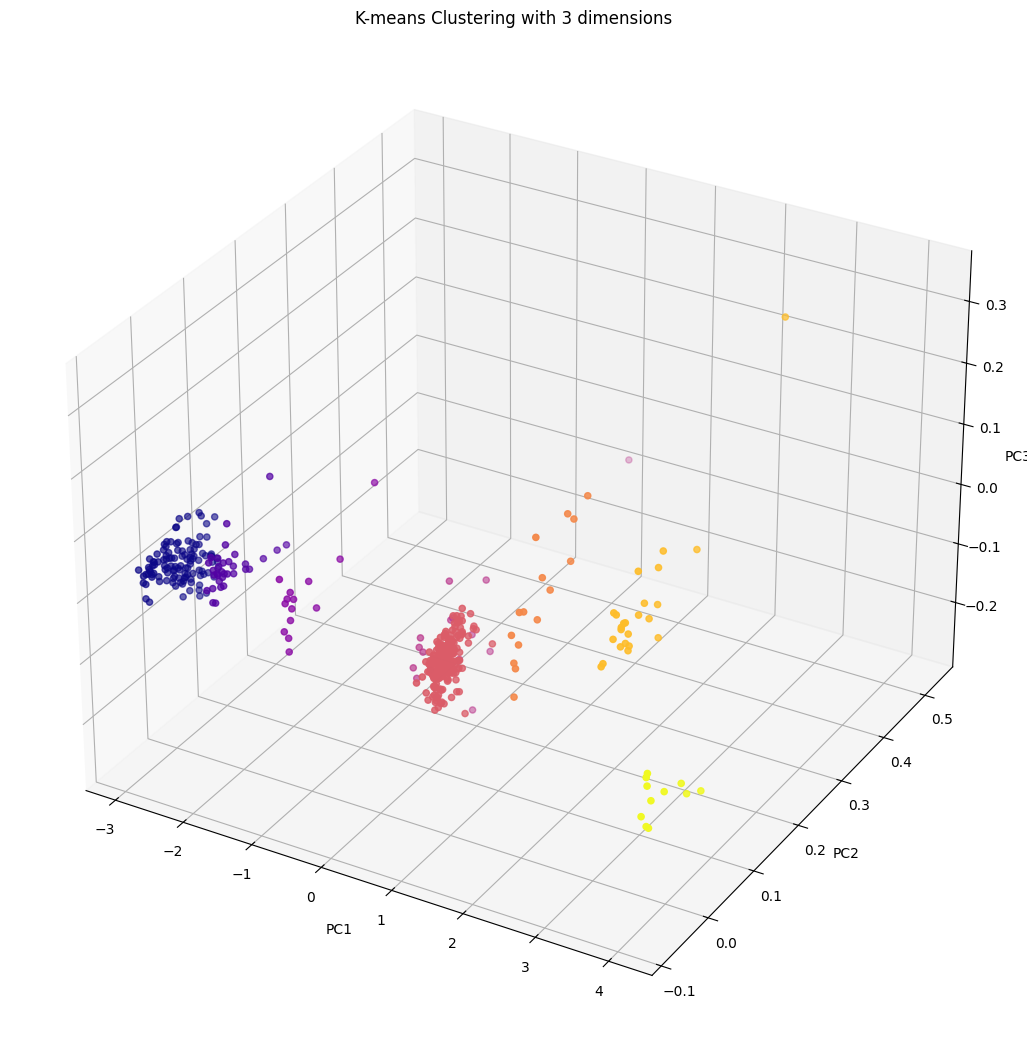

In [130]:
pca_num_components = 3

reduced_data3 = PCA(n_components=pca_num_components).fit_transform(data3)
results3 = pd.DataFrame(reduced_data3,columns=['pca1','pca2','pca3'])

fig = plt.figure(figsize=(13,20))
# plt.scatter(results3['pca1'],results3['pca2'],c=data['clusters'],cmap='plasma')
# plt.xlabel('pc1')
# plt.ylabel('pc2')

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(results3['pca1'],results3['pca2'],results3['pca3'], c=data3['clusters'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

plt.title('K-means Clustering with 3 dimensions')
plt.show()

In [128]:
categ_clusters = np.unique(maxValueIndex.values)
clusters = {}
for i in categ_clusters:
    clusters[i] = []

In [70]:
for items in maxValueIndex.iteritems(): 
    clusters[items[1]].append(items[0])

/var/folders/fp/22qg4pcs1fb435p63ml8pvb40000gn/T/ipykernel_690/3415957163.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for items in maxValueIndex.iteritems():


In [71]:
results = []
df_analise_categ = pd.read_csv("pymusas_dict.csv", sep=";")
df_analise_categ["Count"] = [0 for i in range(len(df_analise_categ))]
df_analise_categ.set_index('Tag', inplace=True)
df_analise_categ

for file in clusters["Drama, the theatre and show business"]:
    article = open(path + file, 'r')
    content = article.read()
    result = process_text_pt(content)
    results.append(result)

for result in results:
    for sub_result in result:
        for tag in sub_result['USAS Tags']:
            if tag in df_analise_categ.index:
                df_analise_categ.at[tag, 'Count'] += 1

df_analise_categ["Count"] = df_analise_categ["Count"] / df_analise_categ["Count"].sum()
df_analise_categ = df_analise_categ.reset_index()
for index, row in df_analise_categ.iterrows():
    if row["Count"] == 0:
        df_analise_categ = df_analise_categ.drop(index)
df_analise_categ = df_analise_categ.sort_values(by="Count", ascending=False)

df_analise_categ = df_analise_categ.drop([36, 211, 446, 452, 450])

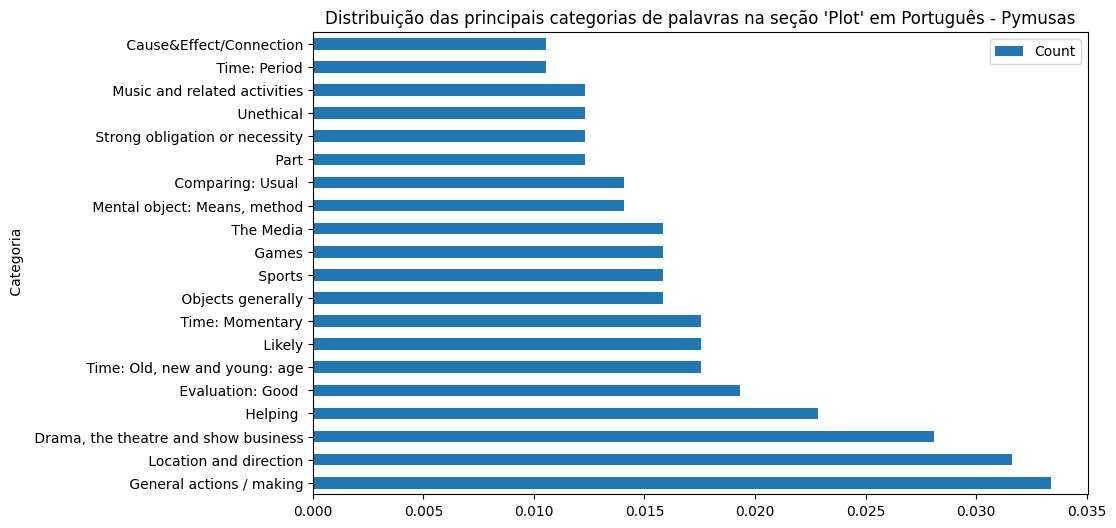

In [73]:
df_plot = df_analise_categ.iloc[:20]
df_plot.plot(x=" Categoria", y=["Count"], kind='barh', figsize=(10,6))
plt.title("Distribuição das principais categorias de palavras na seção 'Plot' em Português - Pymusas")
plt.yticks(fontsize=10)
plt.show()

In [7]:
ingles = {
2.0: ['Peyton Place (film).txt', 'The Good Earth (film).txt', 'Crossfire (film).txt', 'The Favourite.txt', 'Heaven Can Wait (1978 film).txt', 'Extremely Loud & Incredibly Close (film).txt', 'Boys Town (film).txt', 'Three Billboards Outside Ebbing, Missouri.txt', 'Jerry Maguire.txt', 'Five Star Final.txt', 'The Accidental Tourist (film).txt', 'The Towering Inferno.txt', 'In Old Chicago.txt', 'Mr. Smith Goes to Washington.txt', 'Midnight Cowboy.txt', 'Marty (film).txt', 'The Broadway Melody.txt', 'Field of Dreams.txt', 'Kramer vs. Kramer.txt', 'Babe (film).txt', 'The Wizard of Oz.txt', 'Seven Brides for Seven Brothers.txt', 'Mildred Pierce (film).txt', 'Chicago (2002 film).txt', 'Love Affair (1939 film).txt', 'The Prince of Tides.txt', 'Mister Roberts (1955 film).txt', 'L.A. Confidential (film).txt', 'Silver Linings Playbook.txt', "Winter's Bone.txt", 'Deliverance.txt', 'The French Connection (film).txt', 'Mank.txt', 'Dangerous Liaisons.txt', 'Selma (film).txt', 'American Beauty (1999 film).txt', 'Of Mice and Men (1939 film).txt', 'Dog Day Afternoon.txt', 'Hold Back the Dawn.txt', 'Gigi (1958 film).txt', 'Ghost (1990 film).txt', 'Slumdog Millionaire.txt', 'The Song of Bernadette (film).txt', 'All Quiet on the Western Front (1930 film).txt', 'Miracle on 34th Street.txt', 'Moulin Rouge!.txt', 'Dark Victory.txt', 'The Sixth Sense.txt', 'A Few Good Men.txt', 'The Kids Are All Right (film).txt', 'Funny Girl (film).txt', 'A Star Is Born (1937 film).txt', 'Kings Row.txt', 'A Star Is Born (2018 film).txt', 'Since You Went Away.txt', 'M*A*S*H (film).txt', 'The Reader (2008 film).txt', 'Rebecca (1940 film).txt', 'The Fugitive (1993 film).txt', 'On the Waterfront.txt', 'The Patriot (1928 film).txt', 'Yankee Doodle Dandy.txt', 'The Tree of Life (film).txt', "It's a Wonderful Life.txt", 'Quiz Show (film).txt', 'Promising Young Woman.txt', 'Jezebel (1938 film).txt', 'The Martian (film).txt', 'Toy Story 3.txt', 'The Heiress.txt', 'Raging Bull.txt', 'Mr. Deeds Goes to Town.txt', 'Get Out.txt', 'Top Gun: Maverick.txt', 'Moneyball (film).txt', 'Test Pilot (film).txt', 'The Apartment.txt', 'Separate Tables (film).txt', 'Doctor Zhivago (film).txt', 'The Quiet Man.txt', 'Wings (1927 film).txt', 'Alice Adams (1935 film).txt', 'The Graduate.txt', 'The Barretts of Wimpole Street (1934 film).txt', 'The Descendants.txt', 'Sense and Sensibility (film).txt', 'Joker (2019 film).txt', 'Dances with Wolves.txt', 'The Fighter.txt', 'On Golden Pond (1981 film).txt', "Gentleman's Agreement.txt", 'Coming Home (1978 film).txt', 'Norma Rae.txt', 'In the Bedroom.txt', 'Tootsie.txt', 'Hugo (film).txt', 'Flirtation Walk.txt', 'Spellbound (1945 film).txt', 'A Clockwork Orange (film).txt', 'A Place in the Sun (1951 film).txt', 'Born Yesterday (1950 film).txt', 'Arrival (film).txt', 'Brokeback Mountain.txt', 'Erin Brockovich (film).txt', 'Chocolat (2000 film).txt', 'Hello, Dolly! (film).txt', 'Lost in Translation (film).txt', 'The Big Chill (film).txt', 'Million Dollar Baby.txt', 'E.T. the Extra-Terrestrial.txt', 'Chinatown (1974 film).txt', 'To Kill a Mockingbird (film).txt', 'The Conversation.txt', 'Stage Door.txt', 'American Graffiti.txt', 'Lilies of the Field (1963 film).txt', 'Forrest Gump.txt', 'Darling (1965 film).txt', 'I Am a Fugitive from a Chain Gang.txt', 'Sunset Boulevard (film).txt', "All the King's Men (1949 film).txt", 'Dead End (1937 film).txt', 'The Great Dictator.txt', 'A Farewell to Arms (1932 film).txt', 'The Verdict.txt', 'Beasts of the Southern Wild.txt', 'The Pride of the Yankees.txt', 'Libeled Lady.txt', 'Avatar (2009 film).txt', 'Kiss of the Spider Woman (film).txt', 'The Defiant Ones.txt', 'Up (2009 film).txt', 'The Aviator (2004 film).txt', 'Inception.txt', 'Mary Poppins (film).txt', 'The Yearling (1946 film).txt', 'All About Eve.txt', 'Moonstruck.txt', 'Working Girl.txt', 'Cries and Whispers.txt', '127 Hours.txt', 'The Shape of Water.txt', 'The Greatest Show on Earth (film).txt', 'It Happened One Night.txt', 'Juno (film).txt', 'The Great Ziegfeld.txt', 'Imitation of Life (1934 film).txt', 'Butch Cassidy and the Sundance Kid.txt', 'Mississippi Burning.txt', 'David Copperfield (1935 film).txt', 'Places in the Heart.txt', "King Solomon's Mines (1950 film).txt", '7th Heaven (1927 film).txt', 'Sounder (film).txt', 'Pulp Fiction.txt', 'There Will Be Blood.txt', 'Battleground (film).txt', 'Alfie (1966 film).txt', 'Skippy (film).txt', 'Gravity (2013 film).txt', 'The Little Foxes (film).txt', 'Good Will Hunting.txt', 'The Rose Tattoo (film).txt', 'Everything Everywhere All at Once.txt', 'Finding Neverland (film).txt', 'Love Story (1970 film).txt', 'Picnic (1955 film).txt', 'Mad Max: Fury Road.txt', 'West Side Story (1961 film).txt', 'Here Comes Mr. Jordan.txt', 'Suspicion (1941 film).txt', 'Z (1969 film).txt', 'My Left Foot.txt', 'Moonlight (2016 film).txt', 'Fatal Attraction.txt', 'The Lost Weekend.txt', 'Tender Mercies.txt', 'Ordinary People.txt', 'Shane (film).txt', 'Birdman (film).txt', 'The Magnificent Ambersons (film).txt', 'The Divorcee.txt', 'Amadeus (film).txt', 'Taxi Driver.txt', 'Cat on a Hot Tin Roof (1958 film).txt', 'Driving Miss Daisy.txt', "One Flew Over the Cuckoo's Nest (film).txt", 'The Queen (2006 film).txt', 'The Green Mile (film).txt', 'Fanny (1961 film).txt', 'Jaws (film).txt', 'A Letter to Three Wives.txt', 'She Done Him Wrong.txt', 'Black Swan (film).txt', 'Johnny Belinda (1948 film).txt', 'Zorba the Greek (film).txt', 'Scent of a Woman (1992 film).txt', 'Avatar: The Way of Water.txt', 'Women Talking (film).txt'], 
0.0: ['Black Panther (film).txt', 'Dunkirk (2017 film).txt', 'The Bridge on the River Kwai.txt', 'America America.txt', 'Philomena (film).txt', 'Mutiny on the Bounty (1962 film).txt', 'Hacksaw Ridge.txt', 'Crash (2004 film).txt', 'The Godfather Part II.txt', 'Wuthering Heights (1939 film).txt', 'Spotlight (film).txt', 'Witness (1985 film).txt', 'Seabiscuit (film).txt', 'District 9.txt', 'From Here to Eternity.txt', 'Traffic (2000 film).txt', 'Nebraska (film).txt', 'For Whom the Bell Tolls (film).txt', 'Little Women (2019 film).txt', 'A Beautiful Mind (film).txt', 'La La Land.txt', 'The Shawshank Redemption.txt', 'Casablanca (film).txt', 'The Killing Fields (film).txt', 'Terms of Endearment.txt', 'Double Indemnity.txt', "Prizzi's Honor.txt", 'Broadcast News (film).txt', 'A Serious Man.txt', 'Three Coins in the Fountain (film).txt', 'Rain Man.txt', 'The Hurt Locker.txt', 'Goodfellas.txt', 'The Artist (film).txt', 'Bonnie and Clyde (film).txt', 'Gosford Park.txt', 'The Godfather.txt', "Guess Who's Coming to Dinner.txt", 'In the Heat of the Night (film).txt', "Coal Miner's Daughter (film).txt", 'A Room with a View (1985 film).txt', 'Dr. Strangelove.txt', 'The Sound of Music (film).txt', 'Airport (1970 film).txt', 'Roman Holiday.txt', 'Capote (film).txt', 'Chariots of Fire.txt', 'Atlantic City (1980 film).txt', '49th Parallel (film).txt', 'The Russians Are Coming, the Russians Are Coming.txt', '42nd Street (film).txt', 'The Awful Truth.txt', 'An Education.txt', 'Boyhood (2014 film).txt', 'Master and Commander: The Far Side of the World.txt', 'Ray (film).txt', 'The Help (film).txt', 'Doctor Dolittle (1967 film).txt', 'Network (1976 film).txt', 'Reds (film).txt', 'The Lives of a Bengal Lancer (film).txt', 'The Revenant (2015 film).txt', 'The Blind Side (film).txt', 'Apocalypse Now.txt', 'Beauty and the Beast (1991 film).txt', 'The Diary of Anne Frank (1959 film).txt', 'Sergeant York (film).txt', '12 Angry Men (1957 film).txt', 'The Front Page (1931 film).txt', 'The More the Merrier.txt', 'Friendly Persuasion (1956 film).txt', 'Grand Hotel (1932 film).txt', 'The Turning Point (1977 film).txt', 'My Fair Lady (film).txt', 'The Big House (1930 film).txt', 'The Hours (film).txt', 'Bohemian Rhapsody (film).txt', 'Broadway Melody of 1936.txt', 'The Fabelmans.txt', 'Mutiny on the Bounty (1935 film).txt', 'The Ox-Bow Incident.txt', 'The Piano.txt', 'Apollo 13 (film).txt', 'Call Me by Your Name (film).txt', 'Father of the Bride (1950 film).txt', 'Once Upon a Time in Hollywood.txt', 'Tess (1979 film).txt', 'In the Name of the Father (film).txt', 'Ninotchka.txt', 'Giant (1956 film).txt', 'Shine (film).txt', 'Life Is Beautiful.txt', 'The Full Monty.txt', "Don't Look Up.txt", 'Crouching Tiger, Hidden Dragon.txt', 'Ivanhoe (1952 film).txt', 'Dodsworth (film).txt', 'Missing (1982 film).txt', 'Witness for the Prosecution (1957 film).txt', 'Titanic (1997 film).txt', 'Gaslight (1944 film).txt', 'Life of Pi (film).txt', 'The Grand Budapest Hotel.txt', 'The Exorcist.txt', 'The Red Shoes (1948 film).txt', 'The Alamo (1960 film).txt', 'Cavalcade (1933 film).txt', 'Atonement (2007 film).txt', 'Minari (film).txt', 'Hamlet (1948 film).txt', 'The Music Man (1962 film).txt', 'The Crying Game.txt', 'The Caine Mutiny (film).txt', 'The Best Years of Our Lives.txt', 'An American in Paris (film).txt', 'Anatomy of a Murder.txt', 'Stagecoach (1939 film).txt', 'The Banshees of Inisherin.txt', 'One Night of Love.txt', 'Annie Hall.txt', 'Foreign Correspondent (film).txt', "You Can't Take It with You (film).txt", 'Ben-Hur (1959 film).txt', 'True Grit (2010 film).txt', 'As Good as It Gets.txt', 'Oliver! (film).txt', 'Decision Before Dawn.txt', 'Quo Vadis (1951 film).txt', 'The Color Purple (1985 film).txt', 'How the West Was Won (film).txt', 'Roma (2018 film).txt', 'The Adventures of Robin Hood.txt', 'The Last Emperor.txt', 'Trader Horn (1931 film).txt', 'Raiders of the Lost Ark.txt', 'West Side Story (2021 film).txt', 'A Streetcar Named Desire (1951 film).txt', 'The Treasure of the Sierra Madre (film).txt', 'The Letter (1940 film).txt', 'Fargo (1996 film).txt', 'Babel (film).txt', 'How Green Was My Valley (film).txt', 'Anchors Aweigh (film).txt', 'Marriage Story.txt', 'Manchester by the Sea (film).txt', 'The Elephant Man (film).txt', '1917 (2019 film).txt', 'Pygmalion (1938 film).txt', 'Kitty Foyle (film).txt', 'The Deer Hunter.txt', 'The Departed.txt', 'The Curious Case of Benjamin Button (film).txt', 'In Which We Serve.txt', 'The Smiling Lieutenant.txt', 'Tom Jones (1963 film).txt', 'Whiplash (2014 film).txt', 'The Sting.txt', 'Django Unchained.txt', 'Midnight in Paris.txt', 'Captain Phillips (film).txt', 'Green Book (film).txt', 'The Lord of the Rings: The Return of the King.txt', 'Heaven Can Wait (1943 film).txt', 'A Passage to India (film).txt', 'Going My Way.txt', 'Saving Private Ryan.txt', 'The Mission (1986 film).txt', 'Lenny (film).txt', "The Bishop's Wife.txt", 'La Grande Illusion.txt', 'Little Miss Sunshine.txt', 'Mrs. Miniver.txt', "A Soldier's Story.txt", 'Awakenings.txt', 'The Grapes of Wrath (film).txt', 'The Racket (1928 film).txt', 'Cabaret (1972 film).txt', 'Unforgiven.txt', 'Good Night, and Good Luck.txt', 'The Private Life of Henry VIII.txt', 'Moulin Rouge (1952 film).txt', 'A Man for All Seasons (1966 film).txt', 'Disraeli (1929 film).txt', 'Nomadland.txt', 'Anthony Adverse.txt', 'No Country for Old Men.txt', "Schindler's List.txt", 'All That Jazz (film).txt', 'Five Easy Pieces.txt', 'Les Misérables (2012 film).txt', 'The Godfather Part III.txt', 'Midnight Express (film).txt', 'Shakespeare in Love.txt', 'The Maltese Falcon (1941 film).txt'], 
1.0: ['Barry Lyndon.txt', 'Nicholas and Alexandra.txt', 'Bugsy.txt', 'Out of Africa (film).txt', 'All This, and Heaven Too.txt', 'Elvis (2022 film).txt', 'The Cider House Rules (film).txt', 'Judgment at Nuremberg.txt', 'Lincoln (film).txt', 'The Snake Pit.txt', 'Argo (2012 film).txt', 'Captains Courageous (1937 film).txt', 'Munich (2005 film).txt', 'Cimarron (1931 film).txt', 'Watch on the Rhine.txt', 'Bridge of Spies (film).txt', 'The Social Network.txt', 'Elizabeth (film).txt', 'The Guns of Navarone (film).txt', 'Julia (1977 film).txt', 'American Hustle.txt', 'The Insider (film).txt', 'Tár.txt', 'The Philadelphia Story (film).txt', 'Darkest Hour (film).txt', 'Lawrence of Arabia (film).txt', 'Citizen Kane.txt', 'Gangs of New York.txt', 'JFK (film).txt', "The Nun's Story (film).txt", 'Sayonara.txt', 'Four Weddings and a Funeral.txt', 'The Irishman.txt', 'The Remains of the Day (film).txt', "All the President's Men (film).txt", 'Naughty Marietta (film).txt', '12 Years a Slave (film).txt', 'Henry V (1944 film).txt', 'Nixon (film).txt', 'Born on the Fourth of July (film).txt', 'The Pianist (2002 film).txt', 'The Lord of the Rings: The Two Towers.txt', 'Captain Blood (1935 film).txt', 'The Sand Pebbles (film).txt', "The King's Speech.txt", 'The Wolf of Wall Street (2013 film).txt', 'Inglourious Basterds.txt', 'Star Wars (film).txt', 'Gladiator (2000 film).txt', 'Milk (2008 American film).txt', 'Gandhi (film).txt', 'Viva Villa!.txt', 'The Thin Red Line (1998 film).txt', 'The Emigrants (film).txt', 'All Quiet on the Western Front (2022 film).txt', 'The Lord of the Rings: The Fellowship of the Ring.txt', 'Fiddler on the Roof (film).txt', "The Razor's Edge (1946 film).txt", 'Gone with the Wind (film).txt', 'Lost Horizon (1937 film).txt', 'Shanghai Express (film).txt', 'The Longest Day (film).txt', 'War Horse (film).txt', 'Arrowsmith (film).txt', 'Cleopatra (1963 film).txt', 'Around the World in 80 Days (1956 film).txt', 'Braveheart.txt', 'Top Hat.txt', 'Howards End (film).txt', 'The Robe (film).txt', 'The Imitation Game.txt', 'The Life of Emile Zola.txt', 'Lady for a Day.txt', 'Ford v Ferrari.txt', 'One Hour with You.txt', 'Patton (film).txt', 'Little Women (1933 film).txt'], 
3.0: ['East Lynne (1931 film).txt']
}

espanhol = {
3.0: ['Los emigrantes.txt', 'El halcón maltés (película de 1941).txt', 'Picnic (película).txt', 'El cielo y tú.txt', 'El orgullo de los Yanquis.txt', 'El séptimo cielo (película).txt', 'La fuerza del cariño.txt', 'The Magnificent Ambersons.txt', 'Kramer vs. Kramer.txt', 'Gigi.txt', 'Philomena.txt', 'On Golden Pond.txt', 'Desde que te fuiste.txt', "Winter's Bone.txt", 'El príncipe de las mareas.txt', 'A Serious Man.txt', 'Sounder (película de 1972).txt', 'Rain Man.txt', 'Peyton Place (película de 1957).txt', 'Out of Africa.txt', 'Mildred Pierce.txt', 'Nacida ayer (película de 1950).txt', 'Suspicion.txt', 'Carta a tres esposas.txt', 'Marty.txt', 'La vida privada de Enrique VIII.txt', 'El discurso del rey.txt', 'Ellas hablan.txt', 'El violinista en el tejado (película).txt', 'Mi pie izquierdo.txt', 'Tár.txt', 'El lobo de Wall Street.txt', 'Ben-Hur (película de 1959).txt', 'Broadway Melody of 1936.txt', 'American Beauty.txt', 'Citizen Kane.txt', 'Los mejores años de nuestra vida.txt', 'Buenas noches, y buena suerte.txt', 'The Kids Are All Right.txt', 'Sed de escándalo (película de 1931).txt', 'Hamlet (película de 1948).txt', 'Ivanhoe (película de 1952).txt', 'All That Jazz (película).txt', 'The Fighter.txt', 'Reencuentro (película).txt', 'Historia de un matrimonio.txt', 'The Turning Point.txt', 'Little Women (película de 1933).txt', 'Chocolat (película de 2000).txt', 'Yanqui Dandy.txt', 'Mi vida es mi vida.txt', 'The Banshees of Inisherin.txt', 'Love Story (película).txt', 'Desaparecido (película).txt', 'David Copperfield (película de 1935).txt', 'Extremely Loud and Incredibly Close (película).txt', 'Ray (película).txt', 'Imitación de la vida.txt', 'Beasts of the Southern Wild.txt', 'Las horas.txt', 'Libeled Lady.txt', 'Un tranvía llamado Deseo (película de 1951).txt', 'Nido de víboras.txt', 'All About Eve.txt', 'Skippy.txt', 'It Happened One Night.txt', 'Viva Villa!.txt', 'La carta (película de 1940).txt', 'El color púrpura.txt', 'Shine (película).txt', 'La divorciada.txt', 'El golpe (película de 1973).txt', "The Bishop's Wife.txt", 'Vidas truncadas (película).txt', 'Mujercitas (película de 2019).txt', 'Las minas del rey Salomón (película de 1950).txt', 'El padre de la novia (película de 1950).txt', 'The Life of Emile Zola.txt', 'Piloto de pruebas (película de 1938).txt', 'La loba (película de 1941).txt', 'Atracción fatal.txt', 'El patriota (película de 1928).txt'], 
1.0: ['La canción de Bernadette.txt', 'Atonement (película).txt', 'Barry Lyndon.txt', 'La forma del agua.txt', 'Hugo (película).txt', 'Three Billboards Outside Ebbing, Missouri.txt', 'Cat on a Hot Tin Roof (película).txt', 'Gladiator.txt', 'The Reader.txt', 'Fugitivos (película de 1958).txt', 'Jerry Maguire.txt', 'Sense and Sensibility (película).txt', 'El Señor de los Anillos: el retorno del Rey.txt', 'War Horse.txt', 'The Towering Inferno.txt', 'In Old Chicago.txt', 'Zorba, el griego (película).txt', 'Field of Dreams.txt', 'District 9.txt', 'La diligencia.txt', 'Midnight Express.txt', 'Alas (película).txt', 'The Shawshank Redemption.txt', 'E.T., el extraterrestre.txt', 'Jezabel (película de 1938).txt', 'Silver Linings Playbook.txt', 'Double Indemnity.txt', 'El amor llamó dos veces.txt', 'Dangerous Liaisons.txt', 'Hechizo de luna.txt', 'The Hurt Locker.txt', 'Goodfellas.txt', 'Gosford Park.txt', "Guess Who's Coming to Dinner.txt", 'Una hora contigo.txt', 'Los descendientes.txt', 'En el nombre del padre (película de 1993).txt', 'True Grit (película de 2010).txt', 'Medianoche en París.txt', 'Crash (película de 2004).txt', 'Fargo (película).txt', 'Birdman o (la inesperada virtud de la ignorancia).txt', 'Manchester by the Sea (película).txt', 'Lincoln (película).txt', 'Tiburón (película).txt', 'La calle 42.txt', 'Slumdog Millionaire.txt', 'Miracle on 34th Street.txt', 'Moulin Rouge!.txt', 'Lo que el viento se llevó (película).txt', 'El Señor de los Anillos: la Comunidad del Anillo.txt', 'Amadeus.txt', 'The Sixth Sense.txt', 'The Awful Truth.txt', 'The Social Network.txt', '12 Angry Men (película de 1957).txt', 'The French Connection.txt', 'Dama por un día.txt', 'Green Book (película).txt', "All the King's Men.txt", 'Finding Neverland.txt', 'Black Swan.txt', 'Gaslight.txt', 'Moulin Rouge (película de 1952).txt', 'Erin Brockovich (película).txt', 'Apocalypse Now.txt', 'Kings Row.txt', 'Shane.txt', 'In the Heat of the Night.txt', 'El curioso caso de Benjamin Button (película).txt', 'Life of Pi (película).txt', 'El graduado.txt', 'Cuatro bodas y un funeral.txt', 'The Help.txt', 'Aeropuerto (película).txt', 'American Hustle.txt', 'El puente sobre el río Kwai.txt', 'La favorita (película).txt', 'Forrest Gump (película).txt', 'El cielo puede esperar (película).txt', 'Arrowsmith (película).txt', 'The Accidental Tourist.txt', 'Calle sin salida (película de 1937).txt', 'The Grapes of Wrath (película).txt', 'Nebraska (película).txt', 'La rosa tatuada (película).txt', 'Soy un fugitivo.txt', 'El presidio.txt', 'Mesas separadas.txt', 'El gran dictador.txt', 'Despertares.txt', 'El diario de Ana Frank (película).txt', 'El teniente seductor.txt', 'Juno (película).txt', 'Toy Story 3.txt', 'Gravity (película).txt', 'Get Out.txt', 'The Sand Pebbles.txt', 'Top Gun: Maverick.txt', 'The Apartment.txt', 'The Quiet Man.txt', 'A Place in the Sun.txt', 'Once Upon a Time in Hollywood.txt', 'La vuelta al mundo en ochenta días (película de 1956).txt', 'Qué bello es vivir.txt', 'Mary Poppins (película).txt', 'Chicago (película de 2002).txt', 'Dances with Wolves.txt', "Gentleman's Agreement.txt", 'El exorcista (película).txt', 'The Full Monty.txt', "Don't Look Up.txt", 'Tootsie.txt', 'Nacido el cuatro de julio.txt', 'Star Wars: Episodio IV - Una nueva esperanza.txt', 'Babe.txt', 'Up.txt', 'Un americano en París.txt', 'La bella y la bestia (película de 1991).txt', 'Todos los hombres del presidente.txt', "You Can't Take It With You.txt", 'Brokeback Mountain.txt', 'Howards End.txt', 'To Kill a Mockingbird (película).txt', 'Deliverance (película).txt', 'My Fair Lady (película de 1964).txt', 'Babel (película).txt', 'The Crying Game.txt', 'Million Dollar Baby.txt', 'Encrucijada de odios.txt', 'Damas del teatro.txt', 'Elvis (película de 2022).txt', 'A Star Is Born (película de 2018).txt', 'Gigante (película de 1956).txt', 'En un lugar del corazón.txt', 'Grand Hotel (película de 1932).txt', "One Flew Over the Cuckoo's Nest.txt", 'Moonlight (película).txt', 'Unforgiven (película).txt', 'Quiz Show: El dilema.txt', 'El padrino (película).txt', 'Titanic (película de 1997).txt', 'Annie Hall.txt', 'Joker (película).txt', 'Bohemian Rhapsody (película).txt', '127 horas.txt', 'El aviador.txt', 'El motín del Caine.txt', 'La horda.txt', 'El irlandés.txt', 'Three Coins in the Fountain (película).txt', 'The Verdict.txt', '12 Years a Slave.txt', 'La naranja mecánica (película).txt', 'El mago de Oz.txt', 'Mejor... imposible.txt', 'Hasta el último hombre.txt', 'Los miserables (película de 2012).txt', 'El secreto de vivir.txt', 'Inception.txt', 'El beso de la mujer araña (película).txt', 'Si no amaneciera.txt', 'Raiders of the Lost Ark.txt', 'Días sin huella.txt', 'La vida es bella.txt', 'Sangre, sudor y lágrimas (película de 1942).txt', 'La buena tierra (película de 1937).txt', 'El padrino II.txt', 'Heaven Can Wait (película de 1943).txt', 'El hombre elefante (película).txt', 'Capitanes intrépidos.txt', 'Toro salvaje.txt', 'Lenny (película).txt', 'Gritos y susurros.txt', 'The Deer Hunter.txt', 'The Departed.txt', 'Ghost (película de 1990).txt', 'El Gran Hotel Budapest.txt', 'Tarde de perros.txt', 'Mississippi Burning.txt', 'El tesoro de Sierra Madre (película).txt', 'Tess (película de 1979).txt', 'Django Unchained.txt', 'Mank (película).txt', 'The Killing Fields.txt', 'Oliver (película).txt', 'The Artist.txt', 'A Beautiful Mind.txt', 'El renacido.txt', 'Pulp Fiction.txt', 'La llegada.txt', 'El Señor de los Anillos: las dos torres.txt', 'There Will Be Blood.txt', 'El fugitivo (película de 1993).txt', 'Capitán Phillips.txt', 'Going My Way.txt', 'A Star Is Born (película de 1937).txt', 'Coming Home (película).txt', 'Everything Everywhere All at Once.txt', 'Quo vadis? (película de 1951).txt', 'Little Miss Sunshine.txt', 'Sin novedad en el frente (película de 1930).txt', 'Mad Max: Fury Road.txt', 'Anatomía de un asesinato.txt', 'Witness (película).txt', 'Roma (película de 2018).txt', 'Here Comes Mr. Jordan.txt', 'The Green Mile.txt', 'Tender Mercies.txt', 'Ordinary People.txt', 'No Country for Old Men.txt', 'Taxi Driver.txt', 'The Martian.txt', 'Rebecca (película).txt', 'Black Panther (película).txt', 'Driving Miss Daisy.txt', 'Un sueño posible.txt', 'Testigo de cargo (película).txt', 'La señora Miniver.txt', 'Fanny (película de 1961).txt', 'Call Me by Your Name.txt', 'El padrino III.txt', 'Ford v Ferrari.txt', 'She Done Him Wrong.txt', 'Whiplash (película de 2014).txt', 'Avatar (película).txt', 'Bonnie y Clyde (película).txt', 'Avatar: The Way of Water.txt', 'Shakespeare in Love.txt', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb.txt', 'Lo que queda del día (película).txt', 'Cumbres Borrascosas (película de 1939).txt', 'Sunset Boulevard (película).txt'], 
2.0: ['Espejismo de amor.txt', 'Mr. Smith Goes to Washington.txt', 'Of Mice and Men (película de 1939).txt', 'Historia de un soldado (película de 1984).txt', 'Wò hǔ cáng lóng.txt', 'Friendly Persuasion.txt', 'Forja de hombres.txt', 'Judgment at Nuremberg.txt', 'Cabaret (película).txt', 'Spellbound.txt', 'Alfie (película de 1966).txt', 'The Cider House Rules.txt', 'Amarga victoria.txt', 'Atlantic City (película de 1980).txt', 'The Barretts of Wimpole Street.txt', 'Una noche de amor.txt', 'An Education.txt', 'JFK (película).txt', 'El árbol de la vida (película de 2011).txt', 'La conversación.txt', 'Seabiscuit.txt', 'Cabalgata (película).txt', 'On the Waterfront.txt', 'Promising Young Woman.txt', 'The Ox-Bow Incident.txt', 'Pigmalión (película).txt', 'Norma Rae.txt', 'Los lirios del valle.txt', 'In the Bedroom (película).txt', 'Flirtation Walk.txt', 'El honor de los Prizzi.txt', 'The Greatest Show on Earth (película de 1952).txt', 'La heredera (película).txt', 'Capote (película).txt', 'Scent of a Woman.txt', 'Las zapatillas rojas (película de 1948).txt', 'Darling (película).txt', 'American Graffiti.txt', 'Moneyball.txt', 'Network.txt', 'Inglourious Basterds.txt', 'Tú y yo (película de 1939).txt', 'Broadcast News.txt', 'L.A. Confidential.txt', 'La lista de Schindler.txt', 'Boyhood.txt', 'Working Girl.txt', 'Z (película).txt', 'The Insider.txt', "Coal Miner's Daughter.txt", 'Vivir de ilusión.txt', 'Belinda (película).txt', 'La gran ilusión.txt', 'El filo de la navaja (película).txt', 'Levando anclas.txt', 'Good Will Hunting.txt', 'Sin novedad en el frente (película de 2022).txt', 'Cimarrón (película de 1931).txt', 'MASH (película).txt', 'La La Land (película).txt', 'Mutiny on the Bounty (película de 1935).txt', 'De aquí a la eternidad.txt', 'Funny Girl.txt', 'Los Fabelman.txt', 'The Imitation Game.txt', 'El despertar (película de 1946).txt', 'Apolo 13 (película).txt', 'The Philadelphia Story.txt', 'Por quién doblan las campanas (película).txt', 'Siete novias para siete hermanos.txt', 'Alice Adams.txt'], 
0.0: ['Fuego en la nieve (película).txt', 'América, América (película).txt', 'Midnight Cowboy.txt', 'Pasaje a la India.txt', 'Minari.txt', 'Dunkerque (película).txt', 'Hello, Dolly! (película).txt', 'Melodías de Broadway.txt', 'Doctor Dolittle (película de 1967).txt', 'Patton (película).txt', 'Bugsy (película de 1991).txt', 'Enrique V (película de 1944).txt', 'Adiós a las armas (película de 1932).txt', 'Disraeli (película).txt', 'Frost:Nixon.txt', 'The Lives of a Bengal Lancer.txt', 'The Sound of Music.txt', 'A Room with a View (película de 1985).txt', 'Roman Holiday.txt', 'Chariots of Fire.txt', 'Bridge of Spies.txt', 'Foreign Correspondent.txt', 'Un gran reportaje.txt', 'Master and Commander: The Far Side of the World.txt', 'A Few Good Men.txt', 'Watch on the Rhine.txt', '1917 (película).txt', 'Sergeant York.txt', 'Doctor Zhivago (película).txt', 'Sayonara (película).txt', 'West Side Story (película de 2021).txt', 'A Man for All Seasons.txt', 'Los cañones de Navarone.txt', 'Chinatown (película).txt', 'El expreso de Shanghai.txt', 'El Álamo (película de 1960).txt', 'The Piano.txt', 'Gangs of New York.txt', 'La delgada línea roja (película de 1998).txt', 'Casablanca (película).txt', '¡Qué verde era mi valle!.txt', 'Ninotchka.txt', 'The Robe.txt', '49th Parallel.txt', 'La misión.txt', 'Múnich (película).txt', 'Reds.txt', 'The Queen.txt', 'Elizabeth (película).txt', 'El día más largo (película).txt', 'Milk (película).txt', 'Julia (película de 1977).txt', 'Mister Roberts.txt', 'Horizontes perdidos (película de 1937).txt', 'Nicolás y Alejandra.txt', 'El último emperador.txt', 'La conquista del Oeste.txt', 'Cleopatra (película de 1963).txt', 'Lawrence de Arabia (película).txt', 'Argo (película de 2012).txt', 'El capitán Blood (película de 1935).txt', 'Historia de una monja (película).txt', 'Selma (película).txt', 'Decision Before Dawn.txt', 'Dodsworth.txt', 'Spotlight.txt', 'The Adventures of Robin Hood.txt', 'Sombrero de copa (película).txt', 'Gandhi (película).txt', 'Butch Cassidy and the Sundance Kid.txt', 'Traffic (película de 2000).txt', 'West Side Story (película de 1961).txt', 'Naughty Marietta.txt', 'Darkest Hour (película).txt', 'Saving Private Ryan.txt', 'Braveheart.txt', 'Trader Horn.txt', 'Tom Jones (película).txt', 'El pianista.txt', 'Mutiny on the Bounty (película de 1962).txt', 'Lost in Translation.txt', 'Nomadland.txt', 'Anthony Adverse.txt', 'El gran Ziegfeld.txt', '¡Que vienen los rusos!.txt']
}

portugues = {
2.0: ['Quo Vadis (1951).txt', 'A Divorciada.txt', 'Spotlight (filme).txt', "All the President's Men.txt", 'Barry Lyndon.txt', 'A Lista de Schindler.txt', 'Moulin Rouge (1952).txt', 'Three Billboards Outside Ebbing, Missouri.txt', 'Hacksaw Ridge.txt', 'Nicholas and Alexandra.txt', 'Jerry Maguire.txt', 'Bugsy.txt', 'O Senhor dos Anéis: As Duas Torres.txt', 'The Towering Inferno.txt', 'Mr. Smith Goes to Washington.txt', 'Laços de Ternura.txt', 'The Godfather Part II.txt', 'Um Sonho Possível.txt', 'Hamlet (filme de 1948).txt', 'Field of Dreams.txt', 'East Lynne (1931).txt', 'Kramer vs. Kramer.txt', 'Um Lugar no Coração.txt', '12 Angry Men.txt', 'From Here to Eternity.txt', 'The Yearling.txt', 'Gone with the Wind.txt', 'The Shawshank Redemption.txt', 'All This, and Heaven Too.txt', 'On Golden Pond.txt', 'Uma Mente Brilhante.txt', 'Friendly Persuasion.txt', 'Silver Linings Playbook.txt', "Winter's Bone.txt", 'JFK (filme).txt', 'Lilies of the Field (1963).txt', 'Judgment at Nuremberg.txt', 'Double Indemnity.txt', "Prizzi's Honor.txt", 'Capitão Phillips.txt', 'Green Book.txt', 'The Big House.txt', 'Little Women (2019).txt', 'Arrival (filme).txt', 'Rain Man.txt', 'Erin Brockovich (filme).txt', 'The Hurt Locker.txt', 'Out of Africa.txt', 'No Country for Old Men (filme).txt', 'Gosford Park.txt', 'The Cider House Rules.txt', 'The Godfather.txt', 'O Segredo de Brokeback Mountain.txt', 'The Sound of Music.txt', "Guess Who's Coming to Dinner.txt", 'Giant (filme).txt', 'Era uma Vez em... Hollywood.txt', 'O Diário de Anne Frank.txt', 'Up (filme).txt', 'A Star Is Born (1937).txt', 'Quatro Casamentos e Um Funeral.txt', 'O Resgate do Soldado Ryan.txt', 'The Snake Pit.txt', 'Hold Back the Dawn.txt', 'Dunkirk (filme).txt', 'Gravidade (filme).txt', 'O Leitor.txt', 'The Wizard of Oz (1939).txt', 'Viskningar och rop.txt', 'Slumdog Millionaire.txt', 'Cimarron (1931).txt', 'Missing - O Desaparecido.txt', 'Moulin Rouge!.txt', 'Chariots of Fire.txt', 'Bridge of Spies.txt', 'Suspeita.txt', 'The Good Earth.txt', 'Amadeus.txt', 'O Fio da Navalha (1946).txt', 'The Awful Truth.txt', 'Master and Commander: The Far Side of the World.txt', 'Sargento York.txt', 'Hello, Dolly!.txt', 'Um Homem Sério.txt', 'The Greatest Show on Earth.txt', 'Gladiador (filme).txt', 'The French Connection.txt', 'Finding Neverland.txt', 'Captains Courageous.txt', 'Johnny Belinda.txt', 'All Quiet on the Western Front.txt', 'Gaslight.txt', 'O Pianista.txt', 'Howards End (filme).txt', 'Apocalypse Now.txt', 'The Help (filme).txt', 'Shane.txt', 'Uma Hora Contigo.txt', 'Relíquia Macabra.txt', 'American Hustle.txt', 'A Vida É Bela.txt', 'The Longest Day.txt', 'Moonlight (filme).txt', 'Juno (filme).txt', 'The More the Merrier.txt', 'Since You Went Away.txt', 'Seabiscuit.txt', 'The Patriot (filme de 1928).txt', 'A Origem.txt', 'O Tenente Sedutor.txt', 'Born Yesterday.txt', 'On the Waterfront.txt', 'Quiz Show.txt', "It's a Wonderful Life.txt", 'Broadway Melody of 1936.txt', 'Anatomia de um Crime.txt', 'Testemunha de Acusação (filme).txt', 'A Cor Púrpura (filme de 1985).txt', 'Mary Poppins (filme).txt', 'Chinatown (filme).txt', 'Birdman ou (A Inesperada Virtude da Ignorância).txt', 'Toy Story 3.txt', 'Arrowsmith (filme).txt', 'The Heiress.txt', 'O Artista.txt', 'Lawrence da Arábia (filme).txt', 'Get Out.txt', 'The Kids Are All Right.txt', 'The Sand Pebbles.txt', 'Top Gun: Maverick.txt', 'O Exorcista.txt', 'O Céu Pode Esperar (1978).txt', 'O Irlandês.txt', 'La La Land (filme).txt', 'Spellbound (1945).txt', 'Milk (filme).txt', 'Lanceiros da Índia.txt', 'Os Miseráveis (2012).txt', 'Deliverance (filme).txt', 'The Graduate.txt', 'A Árvore da Vida (2011).txt', 'The Robe.txt', 'Avatar: O Caminho da Água.txt', 'Anchors Aweigh.txt', '49th Parallel.txt', 'Laranja Mecânica (filme).txt', 'Tubarão (filme).txt', 'Dances with Wolves.txt', 'The Fighter.txt', 'Manchester by the Sea.txt', 'David Copperfield (1935).txt', 'The Little Foxes.txt', 'Sounder.txt', 'Vidas Separadas.txt', "Don't Look Up.txt", 'Norma Rae.txt', 'O Grande Ditador.txt', "All the King's Men (1949).txt", 'In the Bedroom.txt', 'Titanic (filme de 1997).txt', 'Tootsie.txt', 'A Star Is Born (2018).txt', 'Reds.txt', 'O Pai da Noiva (1950).txt', 'Apollo 13 (filme).txt', 'Sayonara.txt', 'Flirtation Walk.txt', 'Os Descendentes.txt', 'The Grand Budapest Hotel.txt', 'Cisne Negro.txt', 'Uma Loira para Três.txt', 'Atonement.txt', "You Can't Take It with You.txt", 'Cat on a Hot Tin Roof (filme).txt', 'Mister Roberts.txt', 'O Sexto Sentido.txt', 'Babe (1995).txt', 'The Crying Game.txt', 'Rua 42.txt', 'Im Westen nichts Neues (filme).txt', 'The Best Years of Our Lives.txt', 'Gigi (filme).txt', 'Hugo (filme).txt', 'Rebecca (1940).txt', "One Flew Over the Cuckoo's Nest.txt", 'The Banshees of Inisherin.txt', 'Os Canhões de Navarone.txt', 'Ghost (filme).txt', 'O Capitão Blood.txt', 'Annie Hall.txt', 'Darling (filme).txt', 'The Conversation.txt', 'Stagecoach (1939).txt', 'The Racket (1928).txt', 'Stage Door.txt', 'Sense and Sensibility (filme).txt', '127 Horas.txt', 'Forrest Gump.txt', 'I Am a Fugitive from a Chain Gang.txt', 'Crash (2004).txt', 'Sunset Boulevard.txt', 'True Grit (2010).txt', 'Nebraska (filme).txt', 'The Remains of the Day (filme).txt', 'Battleground (filme).txt', 'Disraeli (1929).txt', 'Frost_Nixon.txt', 'The Thin Red Line (1998).txt', 'Star Wars: Episódio IV – Uma Nova Esperança.txt', 'Decision Before Dawn.txt', 'Moneyball.txt', 'O Discurso do Rei.txt', 'Cleópatra (1963).txt', 'Beasts of the Southern Wild.txt', 'Dodsworth.txt', 'Inglourious Basterds.txt', 'Aeroporto (filme).txt', 'Imitation of Life (1934).txt', 'The Pride of the Yankees.txt', 'Libeled Lady.txt', 'Jezebel.txt', 'The Defiant Ones.txt', 'Network (filme).txt', 'O Jogo da Imitação.txt', 'The Magnificent Ambersons (1942).txt', 'Cavalgada (filme).txt', 'À Espera de um Milagre.txt', 'As Horas (filme).txt', 'All About Eve.txt', 'As Vinhas da Ira (filme).txt', 'Raiders of the Lost Ark.txt', 'MASH (filme).txt', 'O Tesouro de Sierra Madre.txt', 'Crossfire (filme).txt', 'L.A. Confidential.txt', '1917 (filme).txt', 'O Expresso da Meia-Noite.txt', 'Moonstruck.txt', 'Boyhood.txt', 'Working Girl.txt', 'Um Dia de Cão.txt', 'Joker (filme).txt', 'Distrito 9.txt', 'Black Panther (filme).txt', 'Passagem para a Índia (filme).txt', 'Bonnie and Clyde.txt', 'Mutiny on the Bounty (1962).txt', 'The Insider.txt', 'Mutiny on the Bounty (1935).txt', 'Dead End.txt', 'A Favorita (filme).txt', 'O Lobo de Wall Street.txt', 'Fargo (filme).txt', 'Tess (filme).txt', 'The Deer Hunter.txt', 'The Departed.txt', 'Elizabeth (filme).txt', 'Of Mice and Men (1939).txt', 'Roma (filme de 2018).txt', 'Horizonte Perdido (1937).txt', 'Bohemian Rhapsody (filme).txt', 'Viva Villa!.txt', 'Oliver!.txt', 'E.T. O Extraterrestre.txt', 'In Which We Serve.txt', 'Perdido em Marte.txt', 'Adversidade.txt', 'Picnic (filme).txt', 'A Ponte do Rio Kwai.txt', 'The Sting.txt', 'Beleza Americana.txt', 'Django Unchained.txt', 'Women Talking.txt', 'The Lord of the Rings: The Fellowship of the Ring.txt', 'Zorba, o Grego (filme).txt', 'O Beijo da Mulher Aranha.txt', 'Pulp Fiction.txt', 'The Lord of the Rings: The Return of the King.txt', 'Born on the Fourth of July.txt', 'O Piano.txt', 'Ray (filme).txt', 'An American in Paris.txt', 'Avatar (filme).txt', 'My Fair Lady.txt', 'There Will Be Blood.txt', 'O Expresso de Xangai.txt', 'A Streetcar Named Desire.txt', "The Bishop's Wife.txt", 'Good Will Hunting.txt', 'Everything Everywhere All at Once.txt', 'Little Miss Sunshine.txt', 'The Alamo (1960).txt', 'Trader Horn.txt', 'Mrs. Miniver.txt', "A Soldier's Story.txt", 'Awakenings.txt', 'O Fugitivo (1993).txt', 'De Ilusão Também Se Vive.txt', 'Atração Fatal.txt', 'Mississípi em Chamas.txt', 'Unforgiven.txt', 'Grande Hotel (filme).txt', 'Consciências Mortas.txt', 'The Revenant.txt', 'The Private Life of Henry VIII.txt', '7th Heaven (1927).txt', 'Here Comes Mr. Jordan.txt', 'My Left Foot.txt', 'Lost in Translation.txt', 'Funny Girl.txt', 'O Homem Elefante.txt', 'Traffic (filme).txt', 'Chicago (filme de 2002).txt', 'Ligações Perigosas (filme).txt', 'West Side Story (1961).txt', 'Mad Max: Estrada da Fúria.txt', 'The Philadelphia Story.txt', 'Lenny (filme).txt', 'Whiplash (filme).txt', 'Taxi Driver.txt', 'Driving Miss Daisy.txt', 'Ben-Hur.txt', 'Five Easy Pieces.txt', 'Lincoln (filme).txt', 'Lady for a Day.txt', 'Love Story (1970).txt', 'Selma (filme).txt', 'Alma em Suplício.txt', 'Call Me by Your Name.txt', 'Ford v Ferrari.txt', 'The Curious Case of Benjamin Button.txt', 'The Godfather Part III.txt', 'A Letter to Three Wives.txt', 'Beauty and the Beast (filme de 1991).txt', 'A Rede Social.txt', 'Doutor Jivago (filme).txt', 'O Bom Pastor (1944).txt', 'The Caine Mutiny.txt', 'Shakespeare in Love.txt', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb.txt'], 
0.0: ['A Room with a View.txt', 'Munique (filme).txt', 'Minari.txt', 'Philomena.txt', 'Julia (filme).txt', 'Roman Holiday.txt', 'Meia-Noite em Paris.txt', 'Foreign Correspondent.txt', 'Life of Pi (filme).txt', 'A Few Good Men.txt', 'A Rainha.txt', 'Watch on the Rhine.txt', 'Cavalo de Guerra.txt', 'Tár.txt', 'Ivanhoe (1952).txt', 'Raging Bull.txt', 'Ninotchka.txt', "King Solomon's Mines (filme de 1950).txt", 'Patton (filme).txt', 'Argo (filme).txt', 'America, America.txt', 'A Carta (1940).txt', 'Three Coins in the Fountain.txt', 'A Volta ao Mundo em 80 Dias (1956).txt', 'A Canção de Bernadette.txt', 'Tom Jones (1963).txt', 'Em Nome do Pai.txt', 'Love Affair (1939).txt', 'Butch Cassidy and the Sundance Kid.txt', 'The Killing Fields.txt', "The Nun's Story.txt", 'O Último Imperador.txt', 'Braveheart.txt', 'Top Hat.txt', 'A Conquista do Oeste.txt', 'Coming Home (1978).txt', 'A Missão.txt', 'A Farewell to Arms (1932).txt', 'The Life of Emile Zola.txt', 'Z (filme).txt', 'Casablanca (filme).txt', 'Henrique V (filme de 1944).txt'], 
4.0: ['Por Quem os Sinos Dobram (filme).txt', 'As Quatro Irmãs.txt', 'Mank (filme).txt', 'A Forma da Água.txt', 'O Veredicto.txt', 'Cabaret (filme).txt', 'The Front Page (1931).txt', 'A Man for All Seasons.txt', 'American Graffiti.txt', 'Broadcast News.txt', 'Pygmalion.txt', 'The Great Ziegfeld.txt', 'Boa Noite, e Boa Sorte.txt', 'O Aviador.txt', 'The Red Shoes.txt'], 
3.0: ['Five Star Final.txt', 'Midnight Cowboy.txt', 'Os Emigrantes.txt', 'O Turista Acidental.txt', 'Elvis (filme de 2022).txt', 'Perfume de Mulher (1992).txt', 'Heaven Can Wait (1943).txt', 'Goodfellas.txt', 'The Barretts of Wimpole Street.txt', 'Asas (filme).txt', 'Marty.txt', 'Shine (filme).txt', 'Dark Victory.txt', 'An Education.txt', 'O Príncipe das Marés.txt', 'Babel (filme).txt', 'Um Lugar ao Sol (filme).txt', 'All That Jazz.txt', 'A Rosa Tatuada.txt', 'Yankee Doodle Dandy.txt', 'Promising Young Woman.txt', 'Citizen Kane.txt', 'Mr. Deeds Goes to Town.txt', 'Gandhi (filme).txt', 'The Apartment.txt', 'Em Cada Coração um Pecado.txt', 'The Big Chill.txt', 'A Luz É para Todos.txt', 'Million Dollar Baby.txt', 'One Night of Love.txt', 'A Testemunha.txt', '12 Years a Slave.txt', 'The Adventures of Robin Hood.txt', 'Alfie.txt', 'O Tigre e o Dragão (filme).txt', 'Kitty Foyle.txt', 'Naughty Marietta.txt', 'Melhor É Impossível.txt', 'Capote.txt', 'Test Pilot.txt', 'Tender Mercies.txt', 'Ordinary People.txt', 'Wuthering Heights (filme de 1939).txt', 'The Turning Point (1977).txt'], 
1.0: ['In Old Chicago.txt', 'The Broadway Melody.txt', 'To Kill a Mockingbird (filme).txt', 'Seven Brides for Seven Brothers.txt', 'Chocolate (filme).txt', 'How Green Was My Valley.txt', 'The Russians Are Coming, the Russians Are Coming.txt', 'Fanny (filme).txt', 'Ou Tudo ou Nada.txt', 'Fiddler on the Roof (filme).txt', 'Farrapo Humano.txt', 'Atlantic City (1980).txt', 'Gangs of New York.txt', 'The Quiet Man.txt', 'West Side Story (2021).txt', 'Os Fabelmans.txt', 'The Music Man.txt', 'Darkest Hour (filme).txt', 'A Grande Ilusão (1937).txt', 'Skippy.txt', 'Marriage Story.txt', 'Boys Town (filme).txt', 'It Happened One Night.txt', "Coal Miner's Daughter.txt", 'No Calor da Noite (filme).txt', 'Doctor Dolittle (1967).txt', 'Extremely Loud and Incredibly Close.txt', 'Peyton Place (filme).txt', 'Nomadland.txt', 'Alice Adams.txt']
}

es2 = {3.0: [], 1.0: [], 2.0: [], 0.0: []}
pt2 = {3.0: [], 1.0: [], 2.0: [], 0.0: [], 4.0: []}

plots.set_index("FILENAME_ES", inplace=True)
for index, value in espanhol.items():
    for e in value:
        es2[index].append(plots.loc[e, "FILENAME_EN"])


In [36]:
for index, value in ingles.items():
    print(index, len(value))

2.0 199
0.0 194
1.0 77
3.0 1


In [35]:
for index, value in espanhol.items():
    print(index, len(value))

3.0 82
1.0 233
2.0 71
0.0 85


In [34]:
for index, value in portugues.items():
    print(index, len(value))

2.0 340
0.0 42
4.0 15
3.0 44
1.0 30


In [9]:
plots.reset_index(inplace=True)
plots.set_index("FILENAME_PT", inplace=True)

for index, value in portugues.items():
    for e in value:
        pt2[index].append(plots.loc[e, "FILENAME_EN"])

In [10]:
pt2

{3.0: ['Five Star Final.txt',
  'Midnight Cowboy.txt',
  'The Emigrants (film).txt',
  'The Accidental Tourist (film).txt',
  'Elvis (2022 film).txt',
  'Scent of a Woman (1992 film).txt',
  'Heaven Can Wait (1943 film).txt',
  'Goodfellas.txt',
  'The Barretts of Wimpole Street (1934 film).txt',
  'Wings (1927 film).txt',
  'Marty (film).txt',
  'Shine (film).txt',
  'Dark Victory.txt',
  'An Education.txt',
  'The Prince of Tides.txt',
  'Babel (film).txt',
  'A Place in the Sun (1951 film).txt',
  'All That Jazz (film).txt',
  'The Rose Tattoo (film).txt',
  'Yankee Doodle Dandy.txt',
  'Promising Young Woman.txt',
  'Citizen Kane.txt',
  'Mr. Deeds Goes to Town.txt',
  'Gandhi (film).txt',
  'The Apartment.txt',
  'Kings Row.txt',
  'The Big Chill (film).txt',
  "Gentleman's Agreement.txt",
  'Million Dollar Baby.txt',
  'One Night of Love.txt',
  'Witness (1985 film).txt',
  '12 Years a Slave (film).txt',
  'The Adventures of Robin Hood.txt',
  'Alfie (1966 film).txt',
  'Crouchin

In [8]:
es2

{3.0: ['The Emigrants (film).txt',
  'The Maltese Falcon (1941 film).txt',
  'Picnic (1955 film).txt',
  'All This, and Heaven Too.txt',
  'The Pride of the Yankees.txt',
  '7th Heaven (1927 film).txt',
  'Terms of Endearment.txt',
  'The Magnificent Ambersons (film).txt',
  'Kramer vs. Kramer.txt',
  'Gigi (1958 film).txt',
  'Philomena (film).txt',
  'On Golden Pond (1981 film).txt',
  'Since You Went Away.txt',
  "Winter's Bone.txt",
  'The Prince of Tides.txt',
  'A Serious Man.txt',
  'Sounder (film).txt',
  'Rain Man.txt',
  'Peyton Place (film).txt',
  'Out of Africa (film).txt',
  'Mildred Pierce (film).txt',
  'Born Yesterday (1950 film).txt',
  'Suspicion (1941 film).txt',
  'A Letter to Three Wives.txt',
  'Marty (film).txt',
  'The Private Life of Henry VIII.txt',
  "The King's Speech.txt",
  'Women Talking (film).txt',
  'Fiddler on the Roof (film).txt',
  'My Left Foot.txt',
  'Tár.txt',
  'The Wolf of Wall Street (2013 film).txt',
  'Ben-Hur (1959 film).txt',
  'Broadway

In [30]:
#plots.reset_index(inplace=True)
#plots.set_index("FILENAME_EN", inplace=True)
todos_filmes_mapeado = plots["index"].copy()

todos_filmes_mapeado = {}

for index, row in plots.iterrows():
    todos_filmes_mapeado[index] = row["index"]

todos_filmes_mapeado

{'The Racket (1928 film).txt': 0,
 '7th Heaven (1927 film).txt': 1,
 'The Broadway Melody.txt': 2,
 'The Patriot (1928 film).txt': 3,
 'All Quiet on the Western Front (1930 film).txt': 4,
 'The Big House (1930 film).txt': 5,
 'Disraeli (1929 film).txt': 6,
 'The Divorcee.txt': 7,
 'Cimarron (1931 film).txt': 8,
 'East Lynne (1931 film).txt': 9,
 'The Front Page (1931 film).txt': 10,
 'Skippy (film).txt': 11,
 'Trader Horn (1931 film).txt': 12,
 'Grand Hotel (1932 film).txt': 13,
 'Arrowsmith (film).txt': 14,
 'Five Star Final.txt': 15,
 'One Hour with You.txt': 16,
 'Shanghai Express (film).txt': 17,
 'The Smiling Lieutenant.txt': 18,
 'Cavalcade (1933 film).txt': 19,
 'A Farewell to Arms (1932 film).txt': 20,
 '42nd Street (film).txt': 21,
 'I Am a Fugitive from a Chain Gang.txt': 22,
 'Lady for a Day.txt': 23,
 'Little Women (1933 film).txt': 24,
 'The Private Life of Henry VIII.txt': 25,
 'She Done Him Wrong.txt': 26,
 'It Happened One Night.txt': 27,
 'The Barretts of Wimpole Stree

In [32]:
en_mapeado = {3.0: [], 1.0: [], 2.0: [], 0.0: []}
es_mapeado = {3.0: [], 1.0: [], 2.0: [], 0.0: []}
pt_mapeado = {3.0: [], 1.0: [], 2.0: [], 0.0: [], 4.0: []}

for index, value in ingles.items():
    for e in value:
        en_mapeado[index].append(todos_filmes_mapeado[e])

for index, value in es2.items():
    for e in value:
        es_mapeado[index].append(todos_filmes_mapeado[e])

for index, value in pt2.items():
    for e in value:
        pt_mapeado[index].append(todos_filmes_mapeado[e])

In [33]:
pt_mapeado

{3.0: [15,
  205,
  221,
  286,
  467,
  307,
  97,
  298,
  28,
  59,
  151,
  324,
  65,
  385,
  302,
  369,
  136,
  248,
  154,
  94,
  460,
  82,
  45,
  261,
  171,
  91,
  267,
  116,
  359,
  31,
  278,
  415,
  55,
  195,
  342,
  78,
  39,
  326,
  365,
  63,
  268,
  251,
  72,
  242],
 1.0: [51,
  2,
  181,
  149,
  341,
  81,
  196,
  174,
  327,
  216,
  107,
  257,
  351,
  141,
  462,
  468,
  179,
  440,
  57,
  11,
  454,
  56,
  27,
  252,
  198,
  200,
  401,
  159,
  457,
  37],
 2.0: [138,
  7,
  428,
  236,
  233,
  308,
  142,
  443,
  435,
  217,
  323,
  300,
  353,
  231,
  67,
  266,
  227,
  383,
  120,
  292,
  9,
  247,
  272,
  161,
  143,
  115,
  64,
  317,
  74,
  258,
  345,
  156,
  414,
  398,
  301,
  186,
  176,
  104,
  277,
  417,
  444,
  5,
  453,
  434,
  285,
  343,
  381,
  274,
  372,
  346,
  336,
  218,
  364,
  191,
  202,
  157,
  456,
  169,
  388,
  54,
  314,
  333,
  124,
  84,
  441,
  418,
  380,
  71,
  225,
  376,
  8,
  263,